In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/jacobemerson/Code/kag_competitions/ht_market_predition_competition/data/train.csv')
df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [3]:
# Rename columns
rename_map = {
    'date_id': 'date_id',

    # Dummy
    **{f'D{i}': f'dummy_{i}' for i in range(1, 10)},

    # Macro Economic
    **{f'E{i}': f'macro_{i}' for i in range(1, 21)},

    # Interest Rates
    **{f'I{i}': f'rate_{i}' for i in range(1, 10)},

    # Market Dynamics / Technical
    **{f'M{i}': f'market_{i}' for i in range(1, 19)},

    # Price / Valuation
    **{f'P{i}': f'price_{i}' for i in range(1, 14)},

    # Sentiment
    **{f'S{i}': f'sent_{i}' for i in range(1, 13)},

    # Volatility
    **{f'V{i}': f'vol_{i}' for i in range(1, 13+1)},

    # Targets
    'forward_returns': 'fwd_returns',
    'risk_free_rate': 'risk_free_rate',
    'market_forward_excess_returns': 'mkt_fwd_excess',
}

df = df.rename(columns=rename_map)


In [4]:
df.columns

Index(['date_id', 'dummy_1', 'dummy_2', 'dummy_3', 'dummy_4', 'dummy_5',
       'dummy_6', 'dummy_7', 'dummy_8', 'dummy_9', 'macro_1', 'macro_10',
       'macro_11', 'macro_12', 'macro_13', 'macro_14', 'macro_15', 'macro_16',
       'macro_17', 'macro_18', 'macro_19', 'macro_2', 'macro_20', 'macro_3',
       'macro_4', 'macro_5', 'macro_6', 'macro_7', 'macro_8', 'macro_9',
       'rate_1', 'rate_2', 'rate_3', 'rate_4', 'rate_5', 'rate_6', 'rate_7',
       'rate_8', 'rate_9', 'market_1', 'market_10', 'market_11', 'market_12',
       'market_13', 'market_14', 'market_15', 'market_16', 'market_17',
       'market_18', 'market_2', 'market_3', 'market_4', 'market_5', 'market_6',
       'market_7', 'market_8', 'market_9', 'price_1', 'price_10', 'price_11',
       'price_12', 'price_13', 'price_2', 'price_3', 'price_4', 'price_5',
       'price_6', 'price_7', 'price_8', 'price_9', 'sent_1', 'sent_10',
       'sent_11', 'sent_12', 'sent_2', 'sent_3', 'sent_4', 'sent_5', 'sent_6',
       'sent_

# Dummy

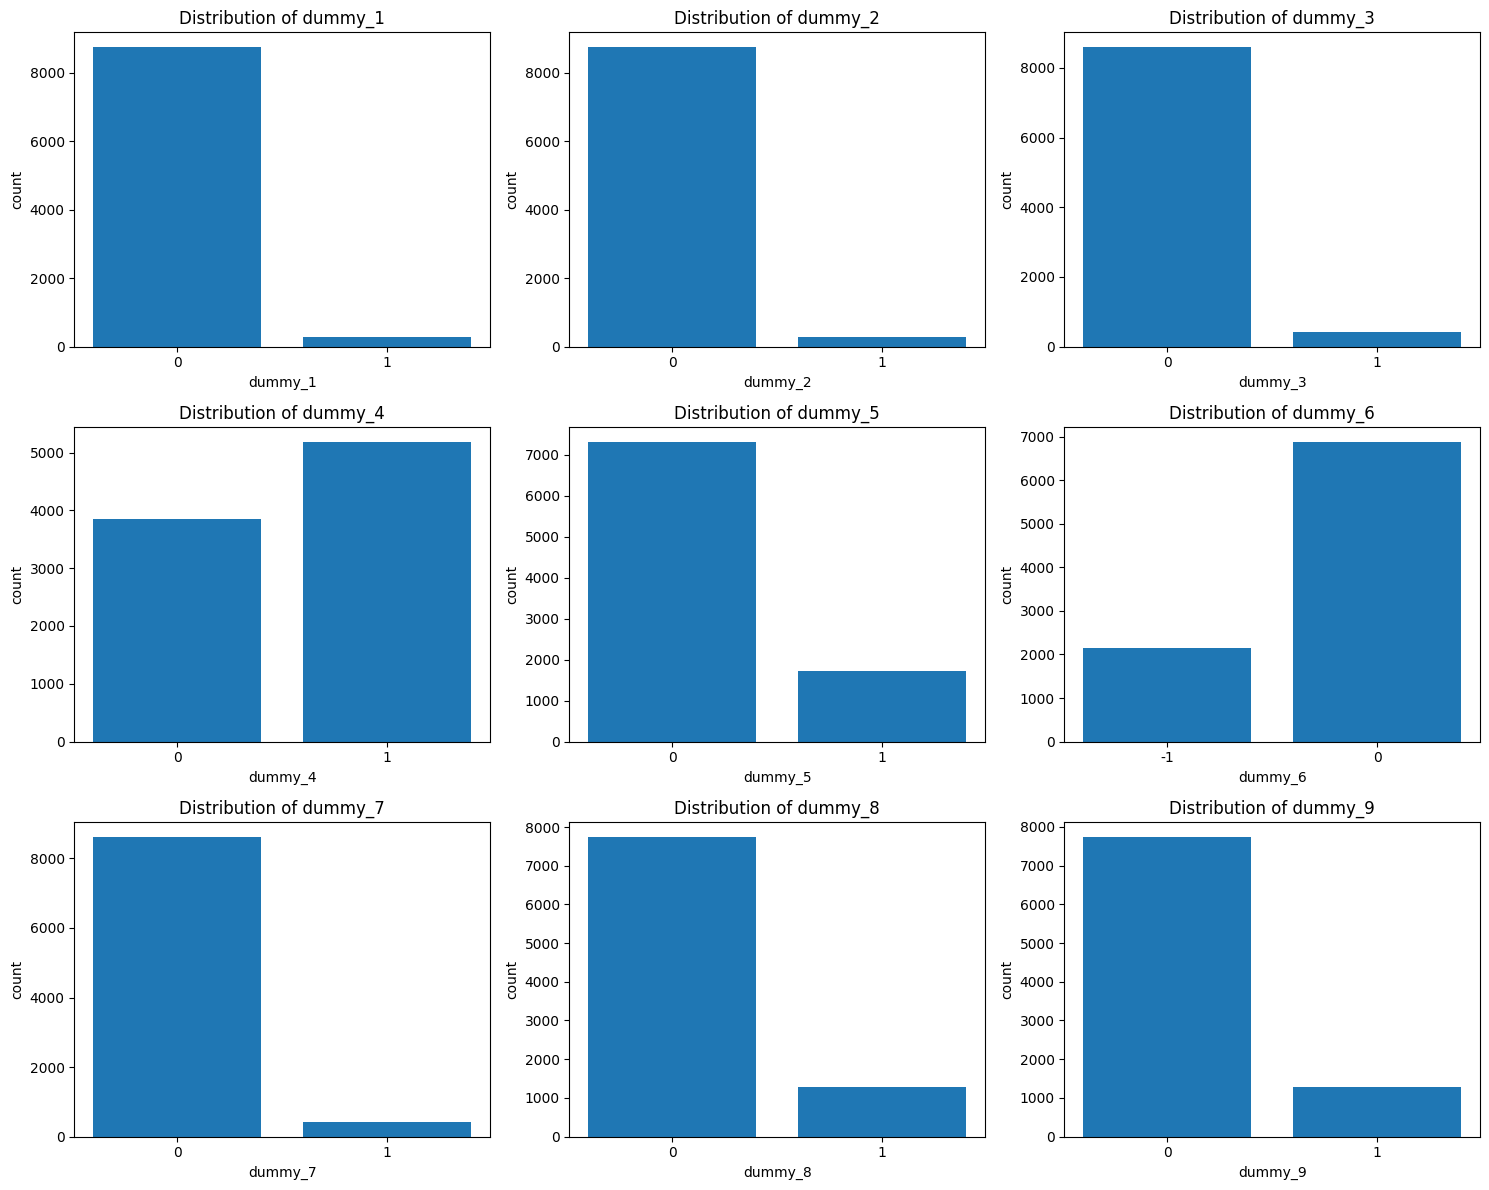

In [5]:
# Distribution of 'dummy' attributes' values
dummy_cols = [f"dummy_{i}" for i in range(1, 10)]

n_cols = 3
n_rows = 3

plt.figure(figsize=(15, 12))

for i, col in enumerate(dummy_cols, 1):
    counts = df[col].value_counts().sort_index()

    plt.subplot(n_rows, n_cols, i)
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")

plt.tight_layout()
plt.show()

# Macro

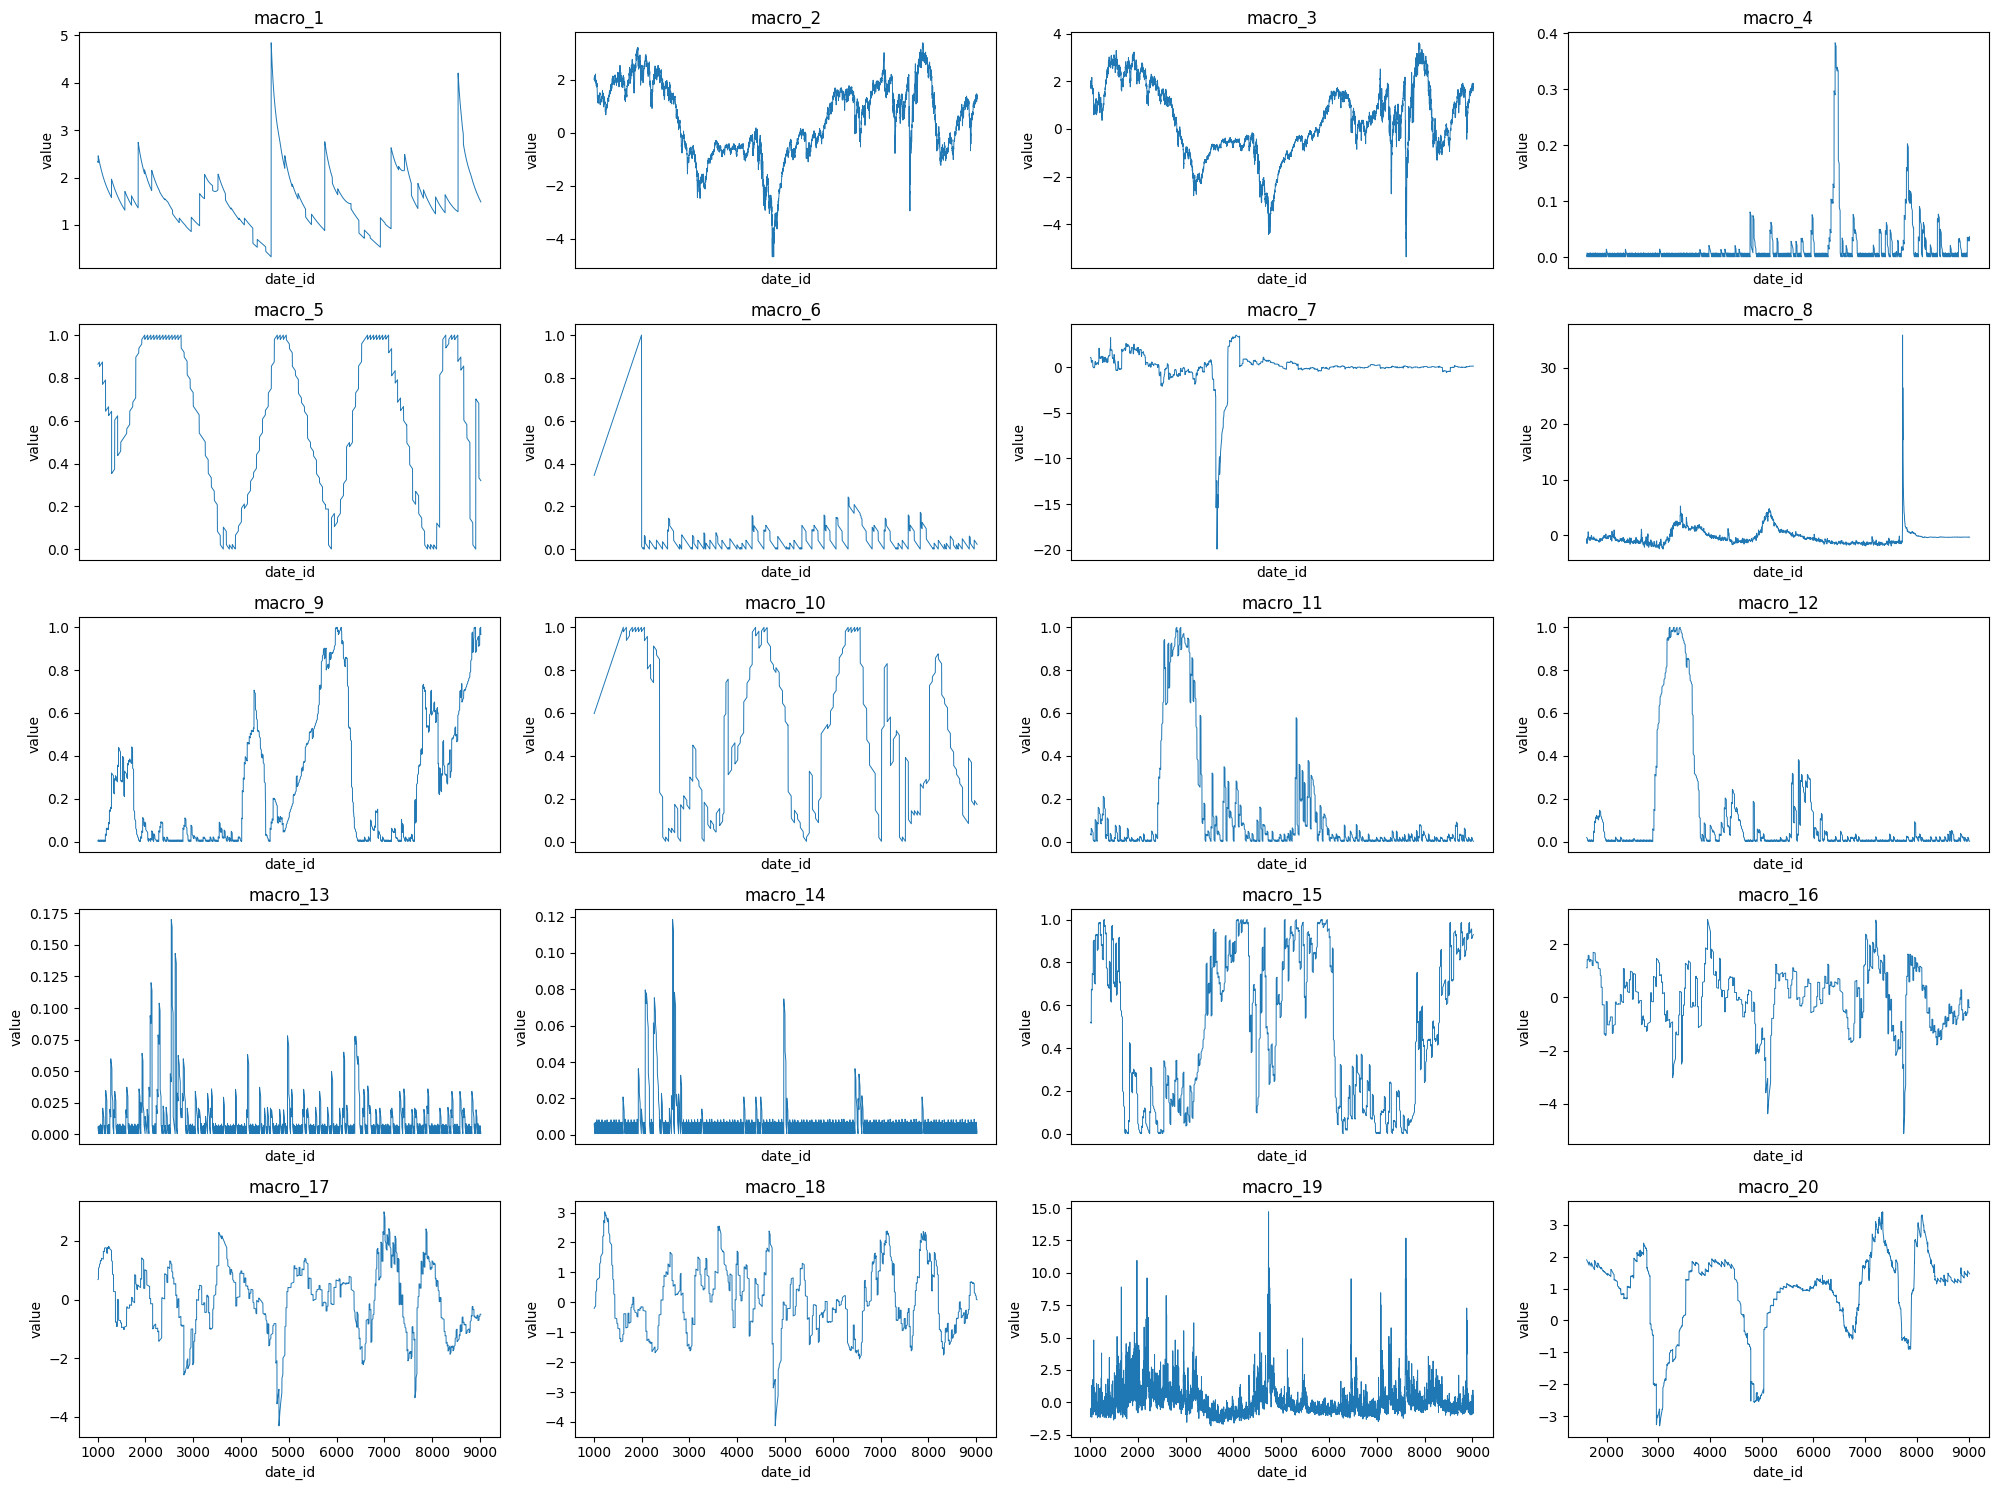

In [6]:
# Distribution of 'macro' attributes' values
macro_cols = [f"macro_{i}" for i in range(1, 21)]

n_cols = 4
n_rows = 5

plt.figure(figsize=(20, 15))

for i, col in enumerate(macro_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(df['date_id'], df[col], linewidth=0.7)
    plt.title(col)
    plt.xlabel("date_id")
    plt.ylabel("value")

    # Optional: reduce clutter if date_id is long
    if i <= (n_rows - 1) * n_cols:
        plt.xticks([])

plt.tight_layout()
plt.show()

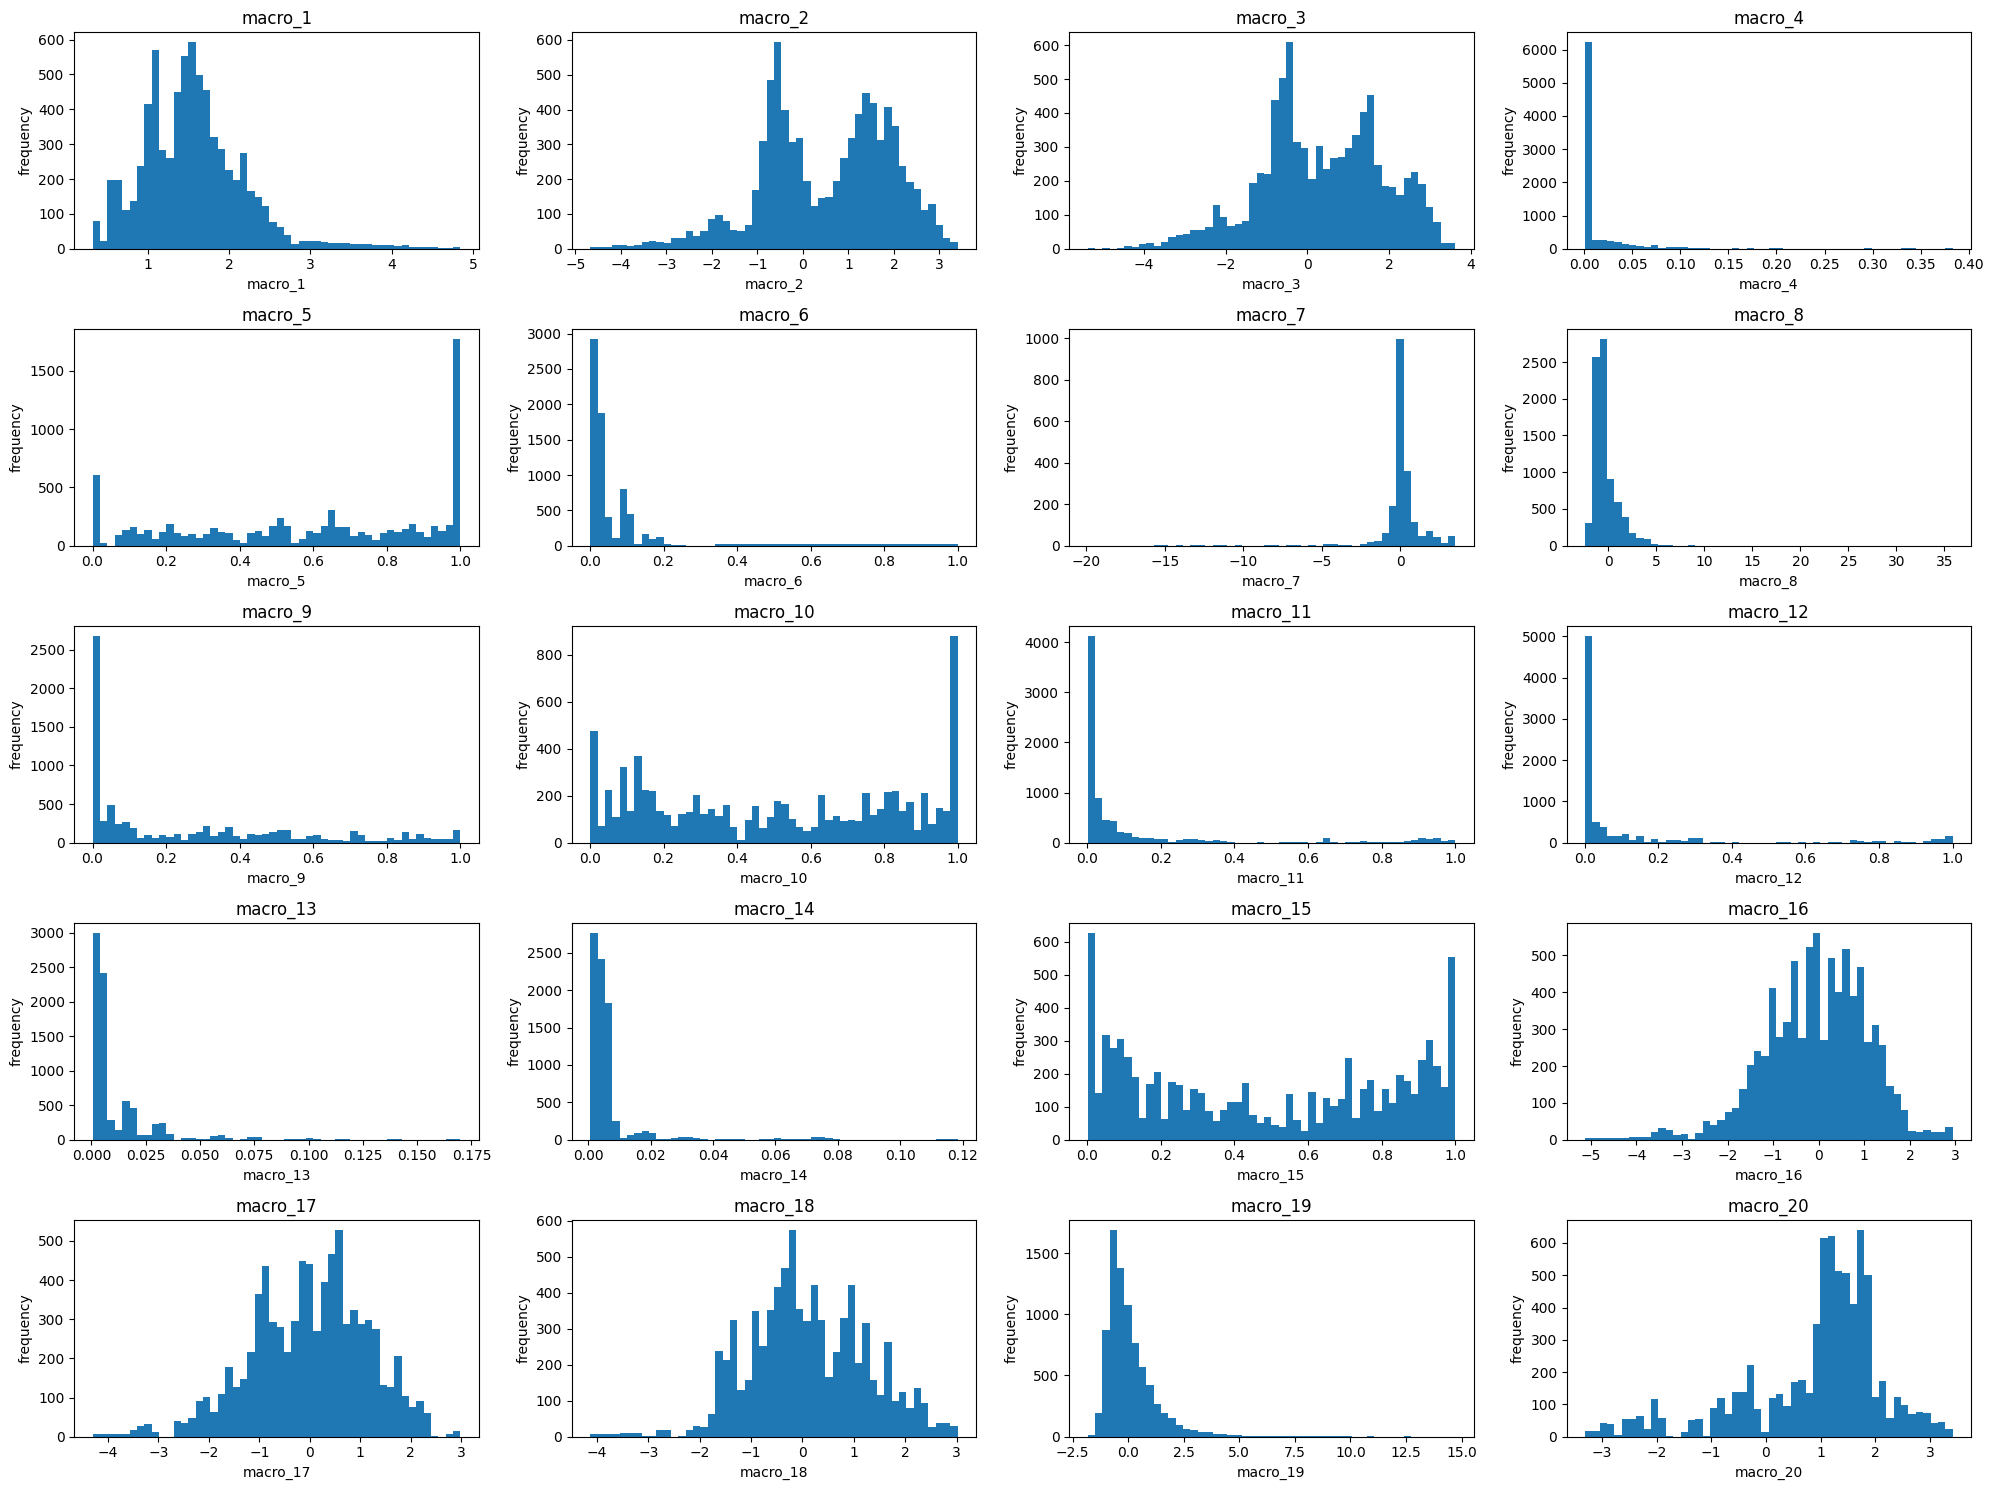

In [35]:
macro_cols = [f"macro_{i}" for i in range(1, 21)]

n_cols = 4
n_rows = 5

plt.figure(figsize=(20, 15))

for i, col in enumerate(macro_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50)  # histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()


# Rate

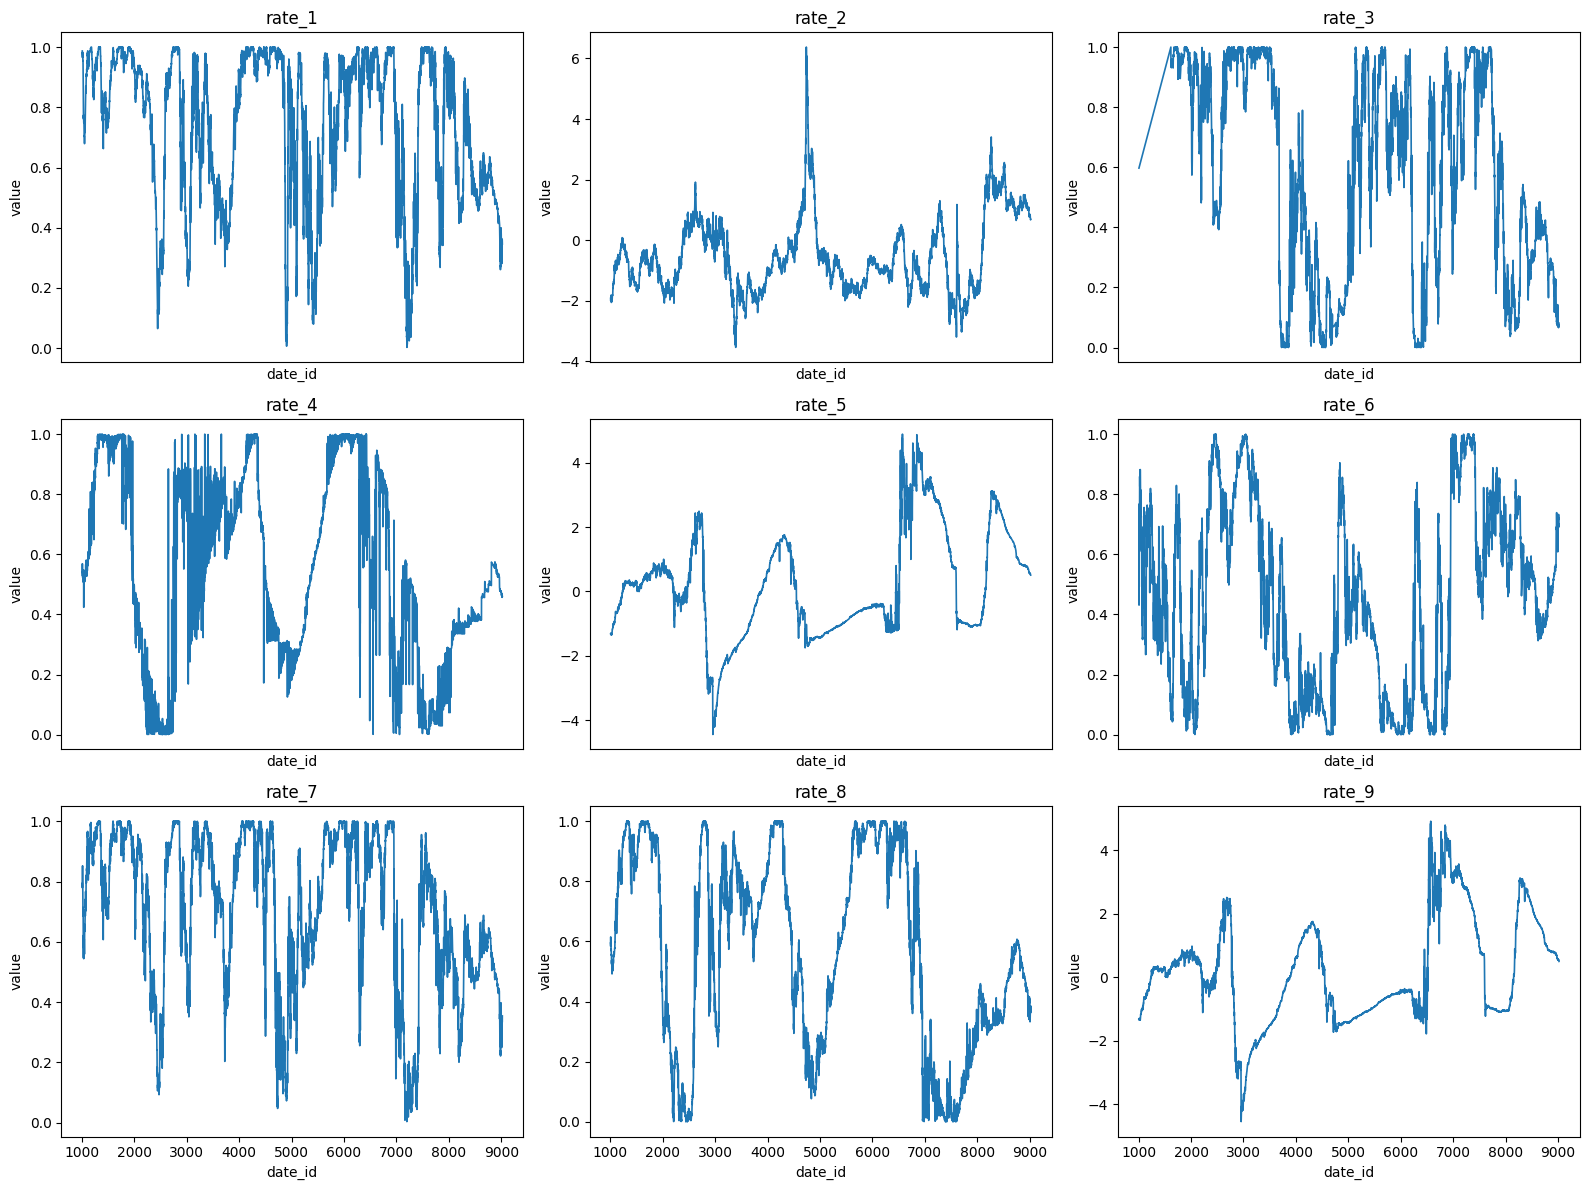

In [ ]:
rate_cols = [f"rate_{i}" for i in range(1, 10)]

n_cols = 3
n_rows = 3

plt.figure(figsize=(16, 12))

for i, col in enumerate(rate_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(df['date_id'], df[col], linewidth=1.2)  # no color argument
    plt.title(col)
    plt.xlabel("date_id")
    plt.ylabel("value")

    # Reduce clutter on x-axis
    if i <= (n_rows - 1) * n_cols:
        plt.xticks([])

plt.tight_layout()
plt.show()


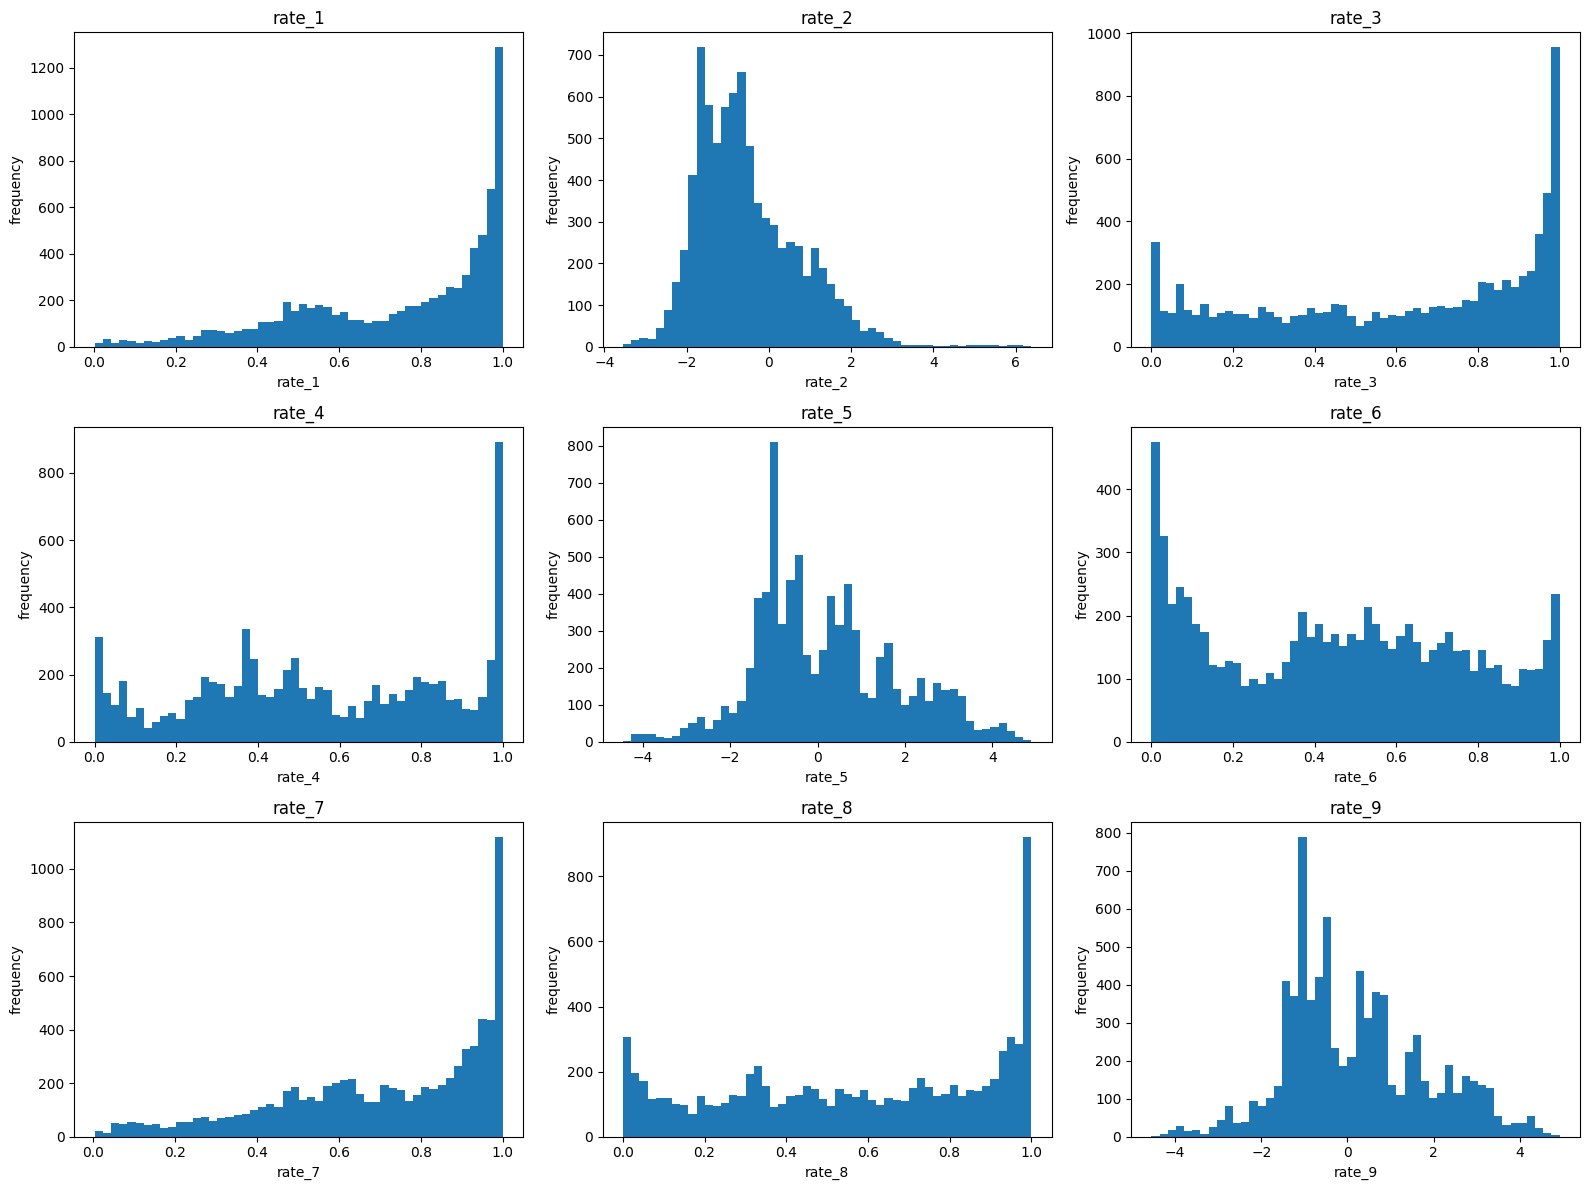

In [34]:
rate_cols = [f"rate_{i}" for i in range(1, 10)]

n_cols = 3
n_rows = 3

plt.figure(figsize=(16, 12))

for i, col in enumerate(rate_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50)  # histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()


# Market

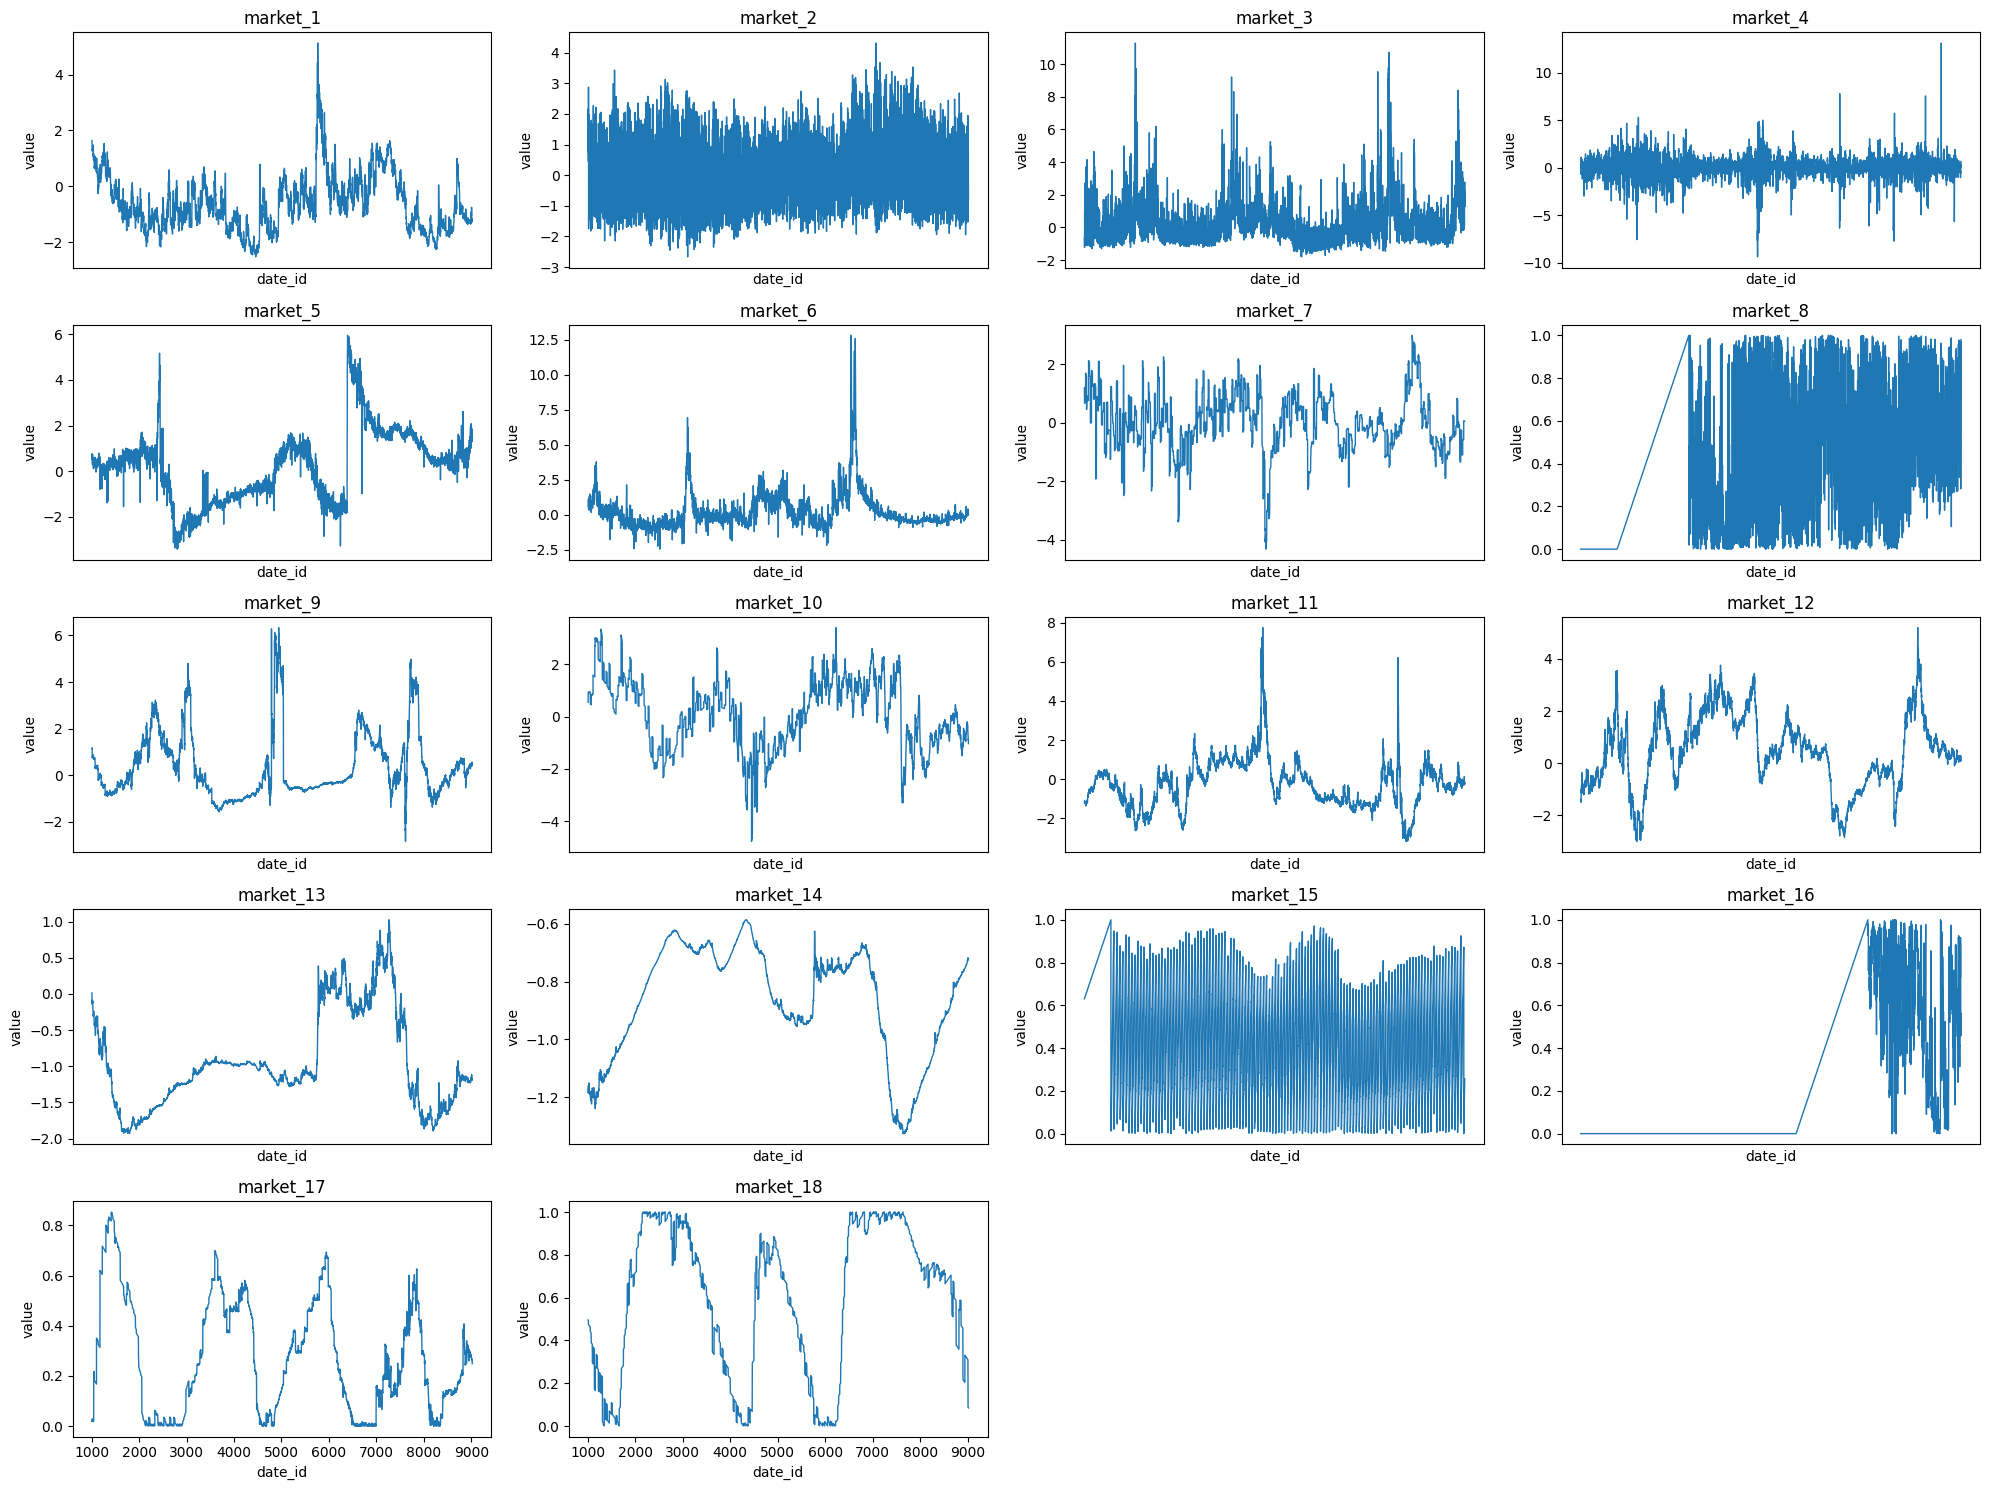

In [14]:
market_cols = [f"market_{i}" for i in range(1, 19)]

n_cols = 4
n_rows = 5

plt.figure(figsize=(20, 15))

for i, col in enumerate(market_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(df['date_id'], df[col], linewidth=1.0)  # default Matplotlib colors
    plt.title(col)
    plt.xlabel("date_id")
    plt.ylabel("value")

    # reduce clutter for x-axis
    if i <= (n_rows - 1) * n_cols:
        plt.xticks([])

plt.tight_layout()
plt.show()


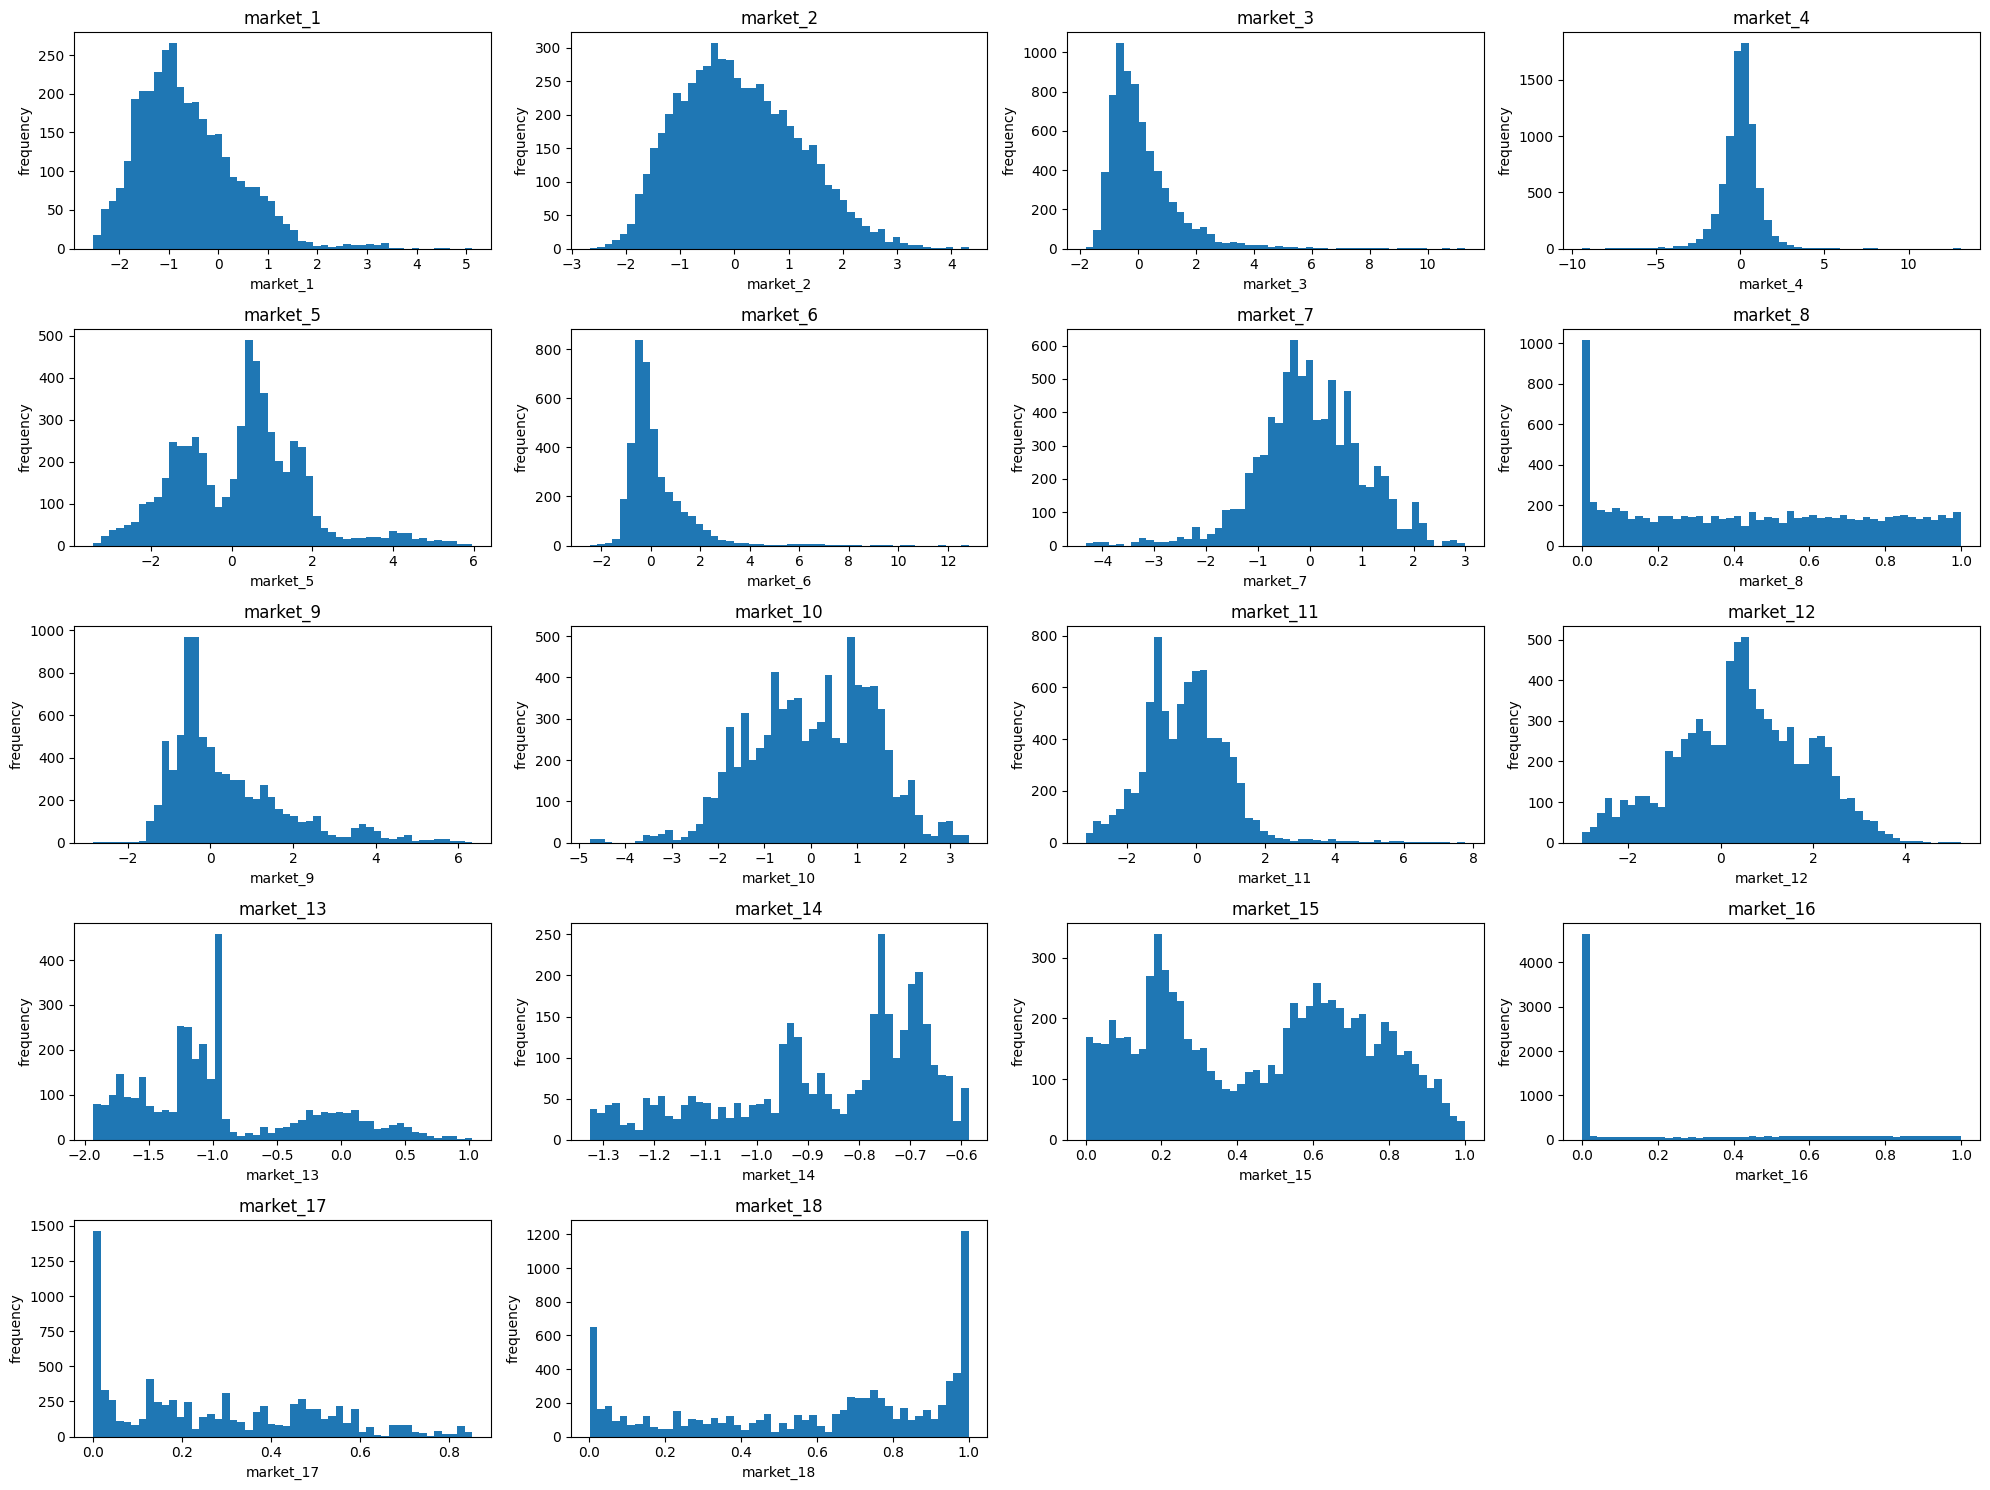

In [33]:
market_cols = [f"market_{i}" for i in range(1, 19)]

n_cols = 4
n_rows = 5   # 18 plots fit into a 4×5 grid (20 slots)

plt.figure(figsize=(20, 15))

for i, col in enumerate(market_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50)  # histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()


# Price

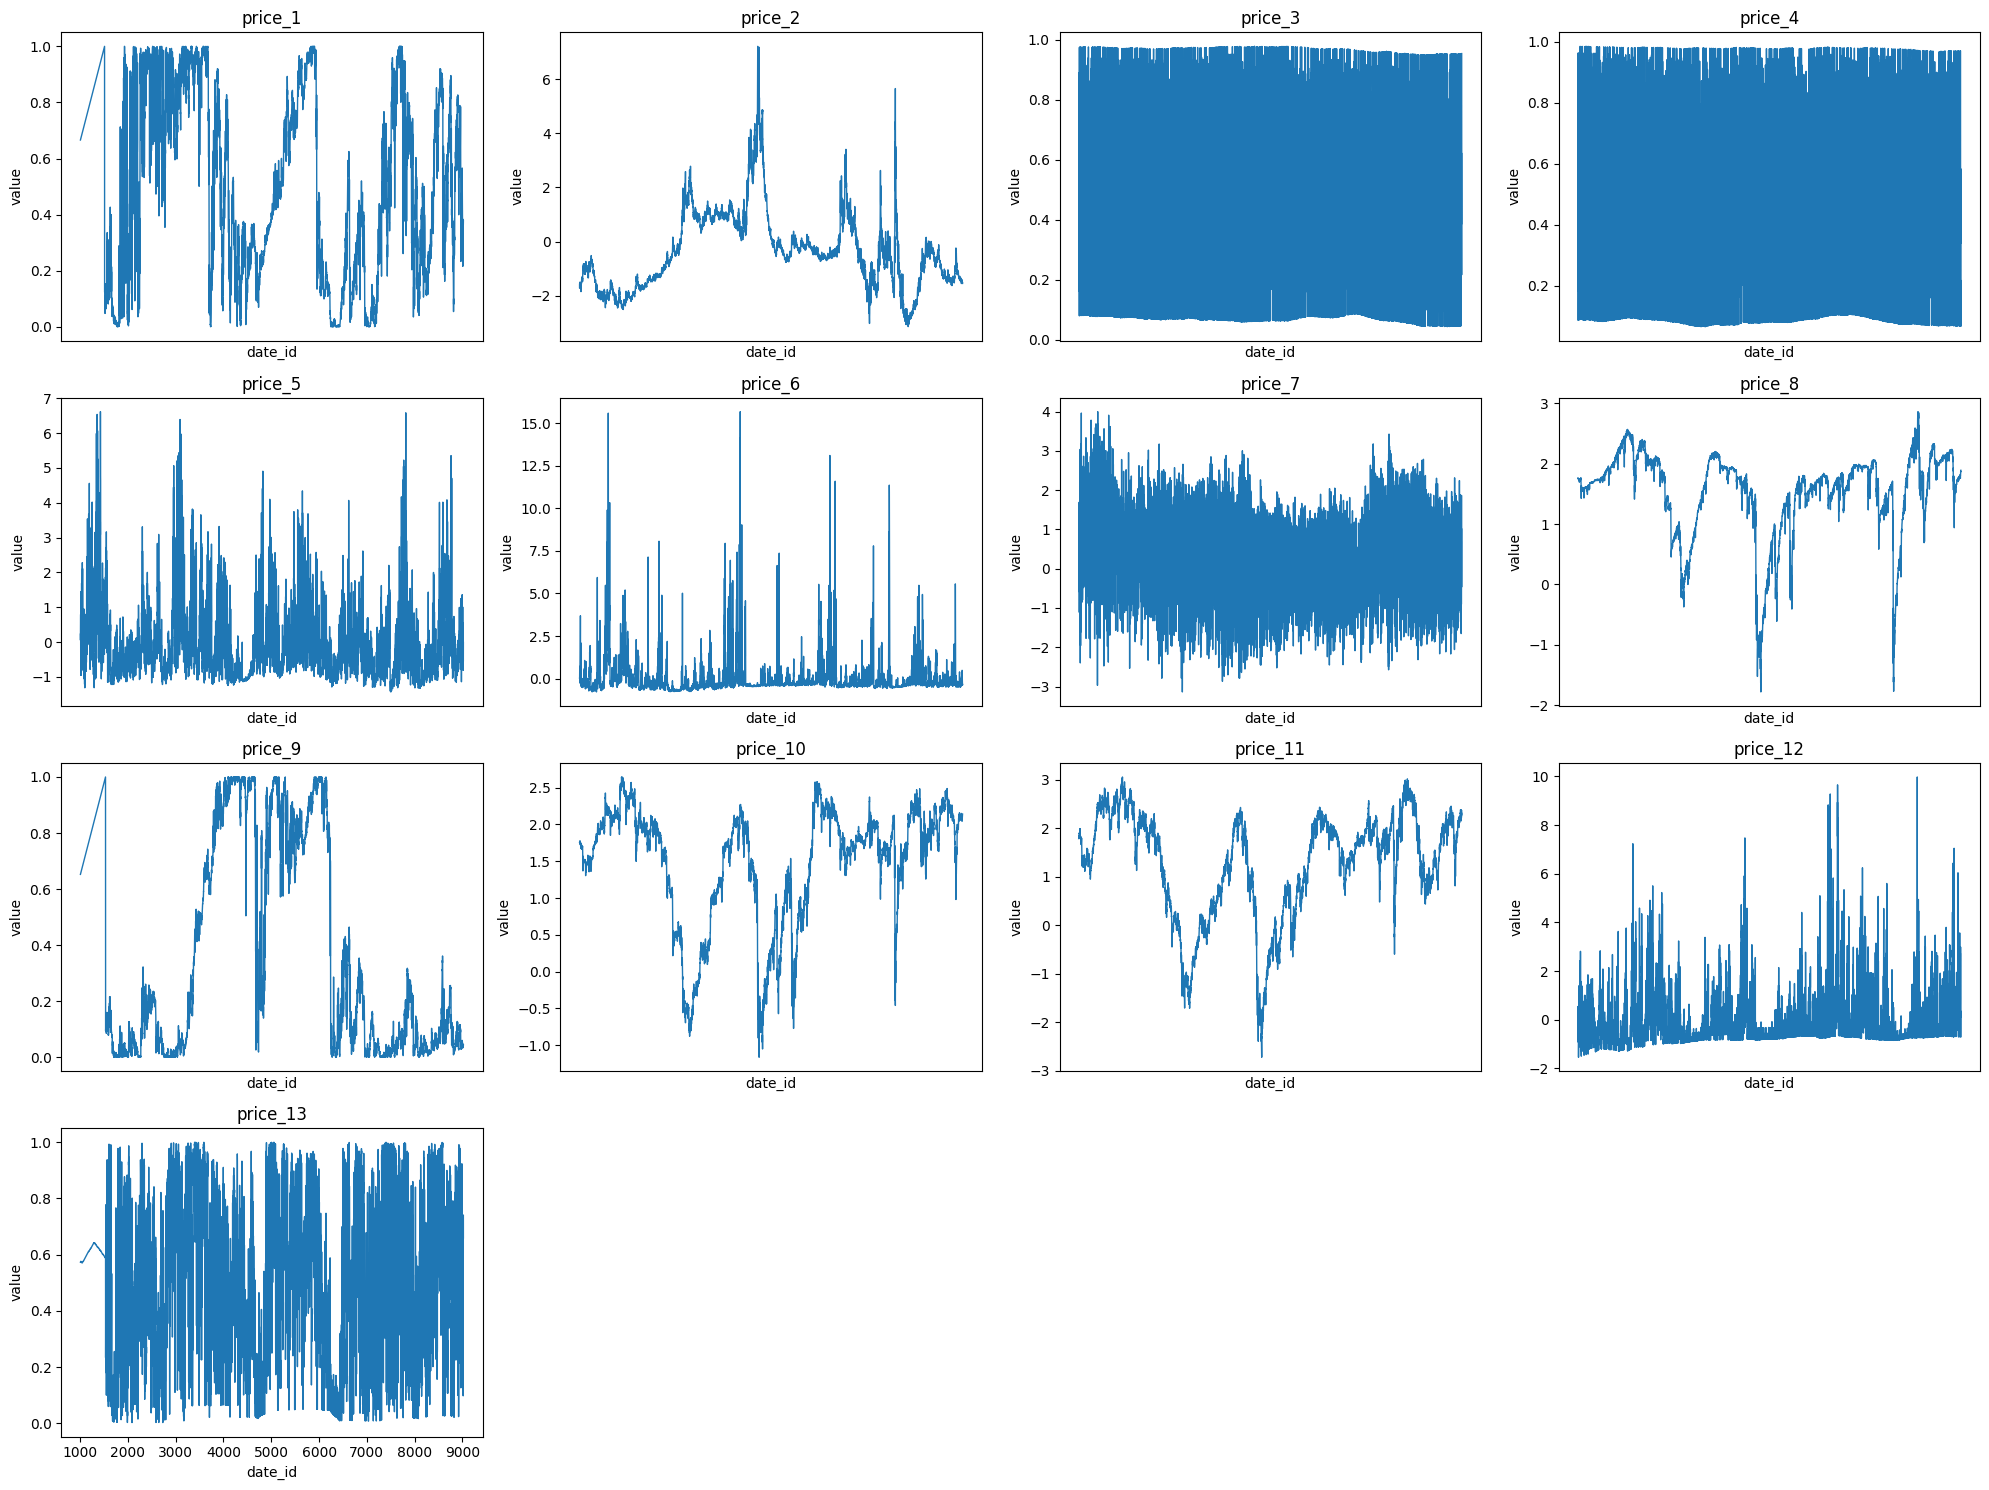

In [17]:
price_cols = [f"price_{i}" for i in range(1, 14)]

n_cols = 4
n_rows = 4   # 4×4 grid → 16 slots, enough for 13 plots

plt.figure(figsize=(20, 15))

for i, col in enumerate(price_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(df['date_id'], df[col], linewidth=1.0)  # default colors
    plt.title(col)
    plt.xlabel("date_id")
    plt.ylabel("value")

    # reduce x-axis clutter
    if i <= (n_rows - 1) * n_cols:
        plt.xticks([])

plt.tight_layout()
plt.show()

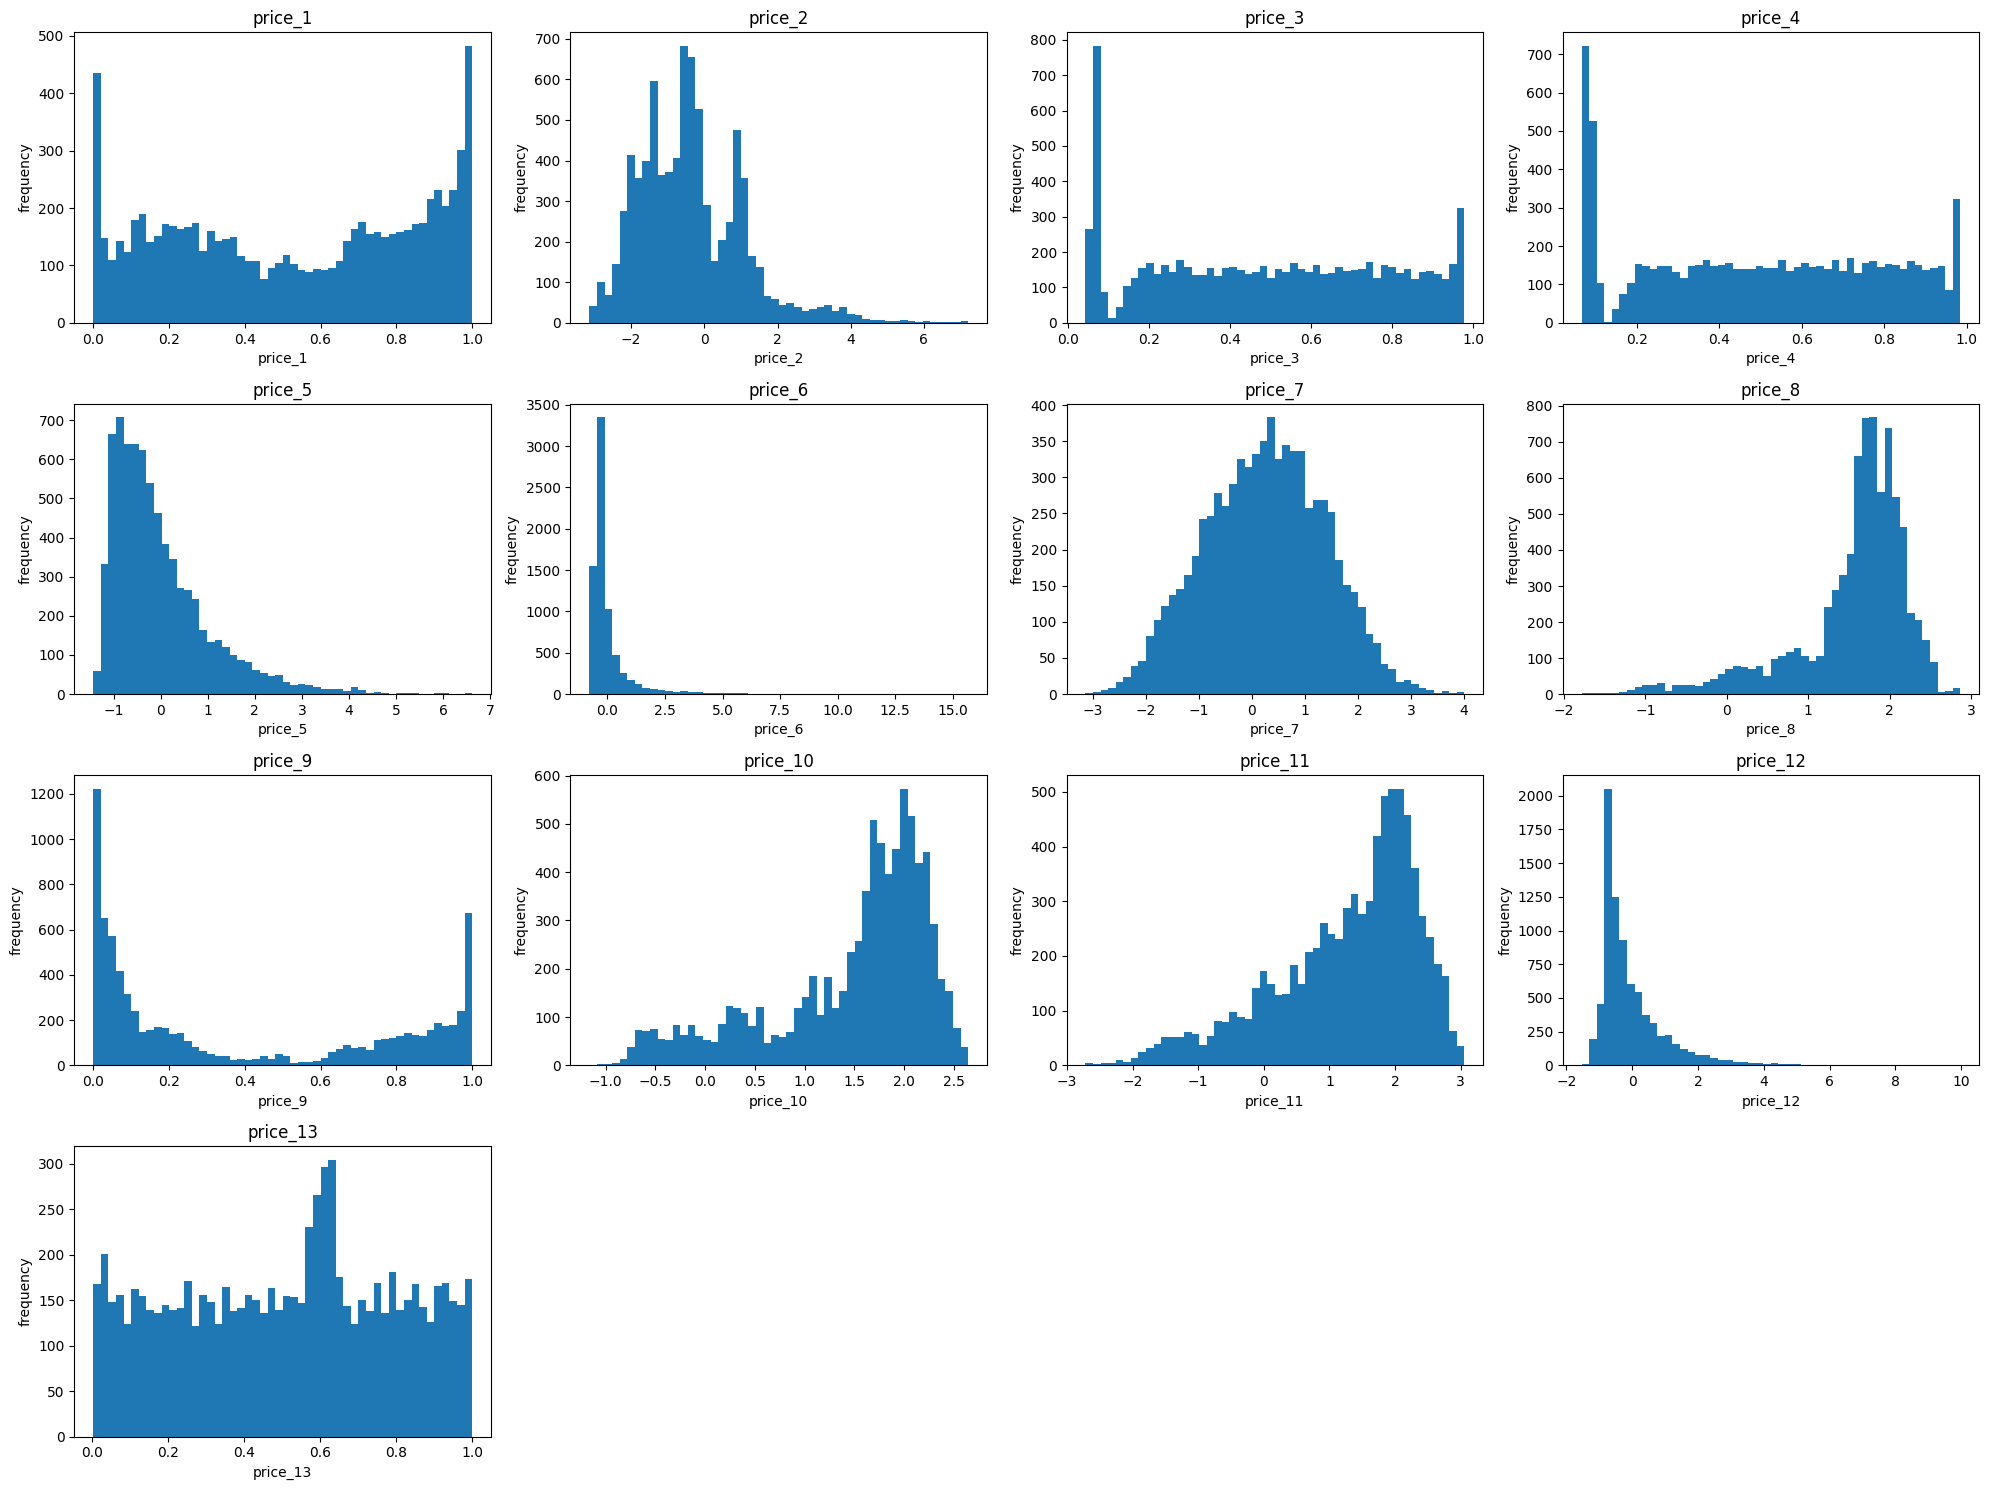

In [32]:
import matplotlib.pyplot as plt

price_cols = [f"price_{i}" for i in range(1, 14)]

n_cols = 4
n_rows = 4   # 13 plots fit into a 4×4 grid (16 slots)

plt.figure(figsize=(20, 15))

for i, col in enumerate(price_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50)  # histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()


# Sentiment

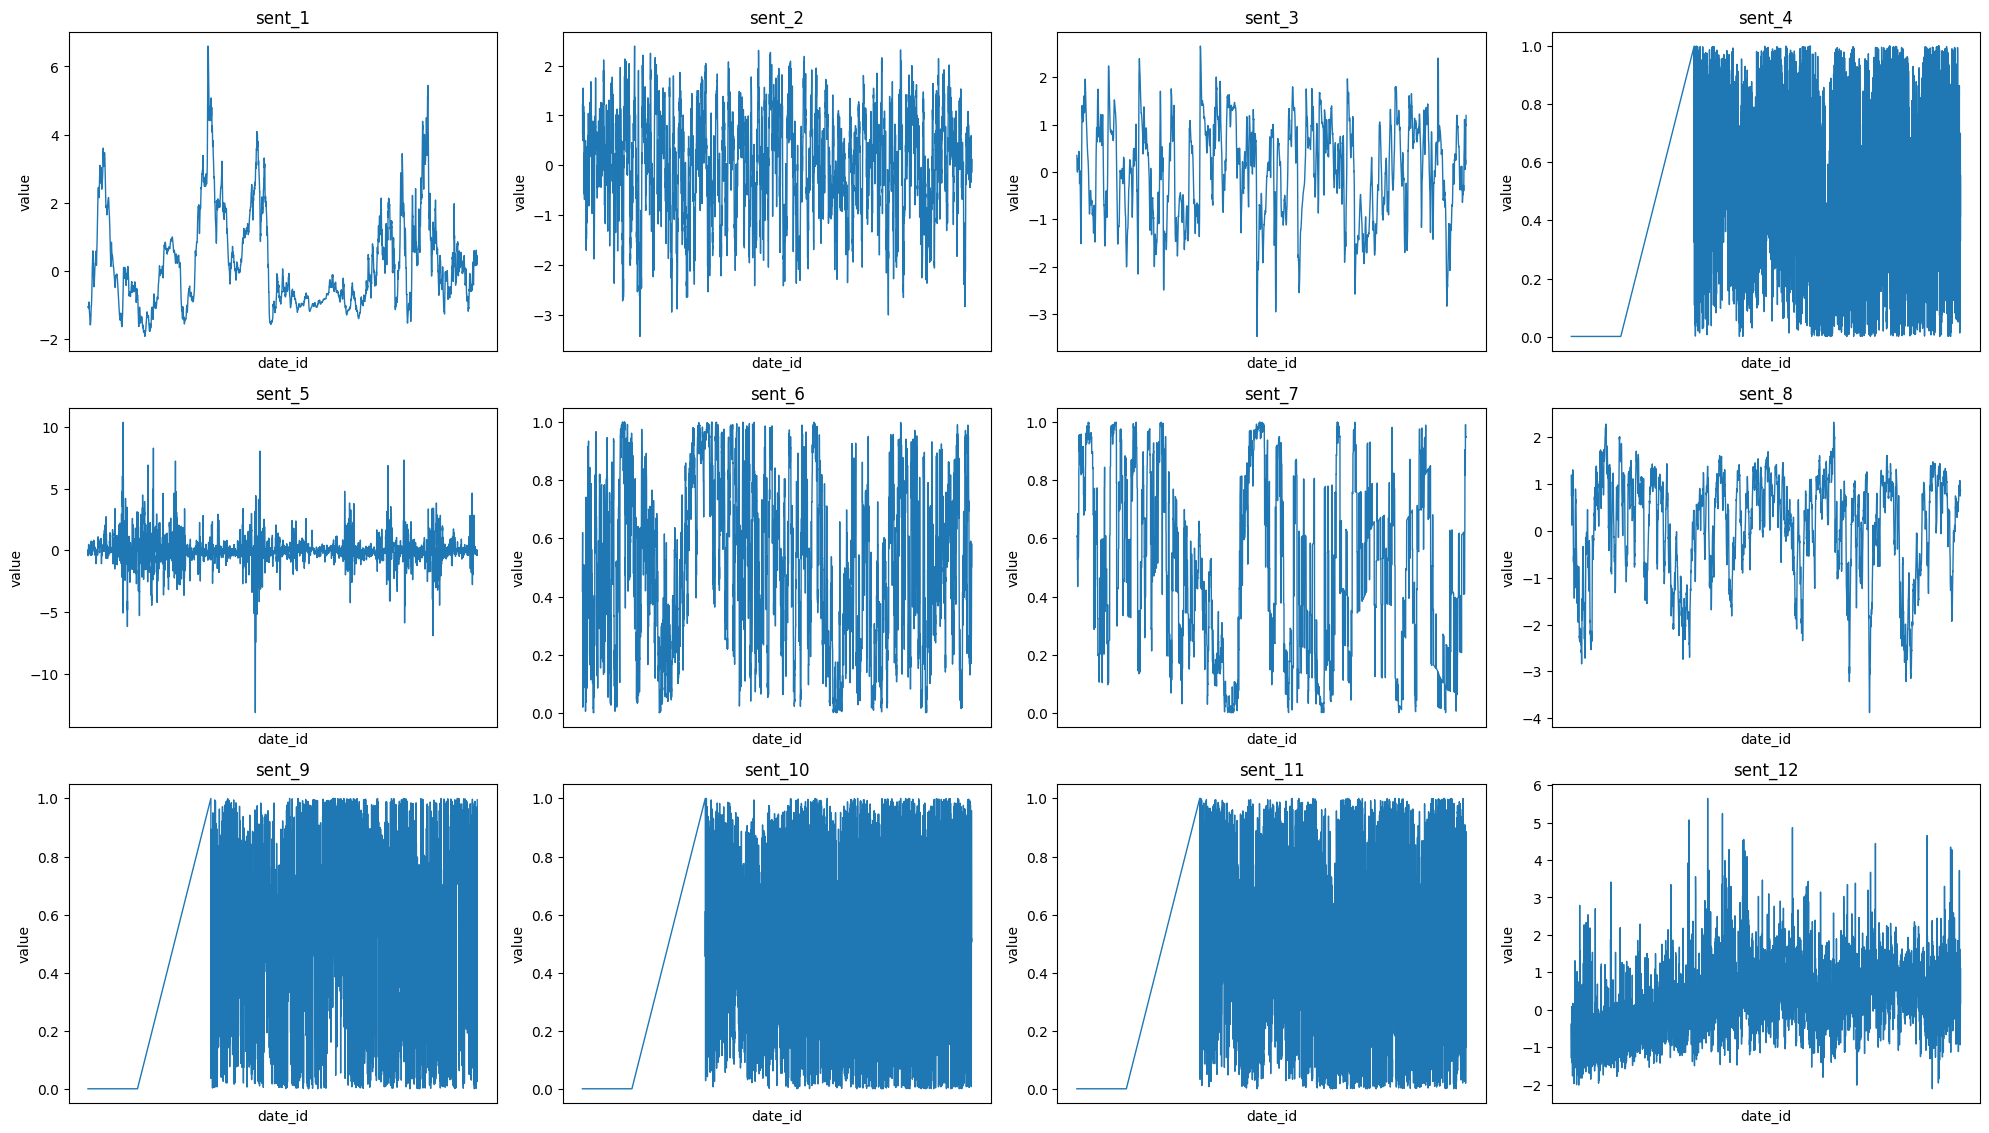

In [ ]:
sent_cols = [f"sent_{i}" for i in range(1, 13)]

n_cols = 4
n_rows = 4   # 13 plots fit into a 4×4 grid (16 slots)

plt.figure(figsize=(20, 15))

for i, col in enumerate(sent_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(df['date_id'], df[col], linewidth=1.0)  # default Matplotlib colors
    plt.title(col)
    plt.xlabel("date_id")
    plt.ylabel("value")

    # Reduce clutter
    if i <= (n_rows - 1) * n_cols:
        plt.xticks([])

plt.tight_layout()
plt.show()


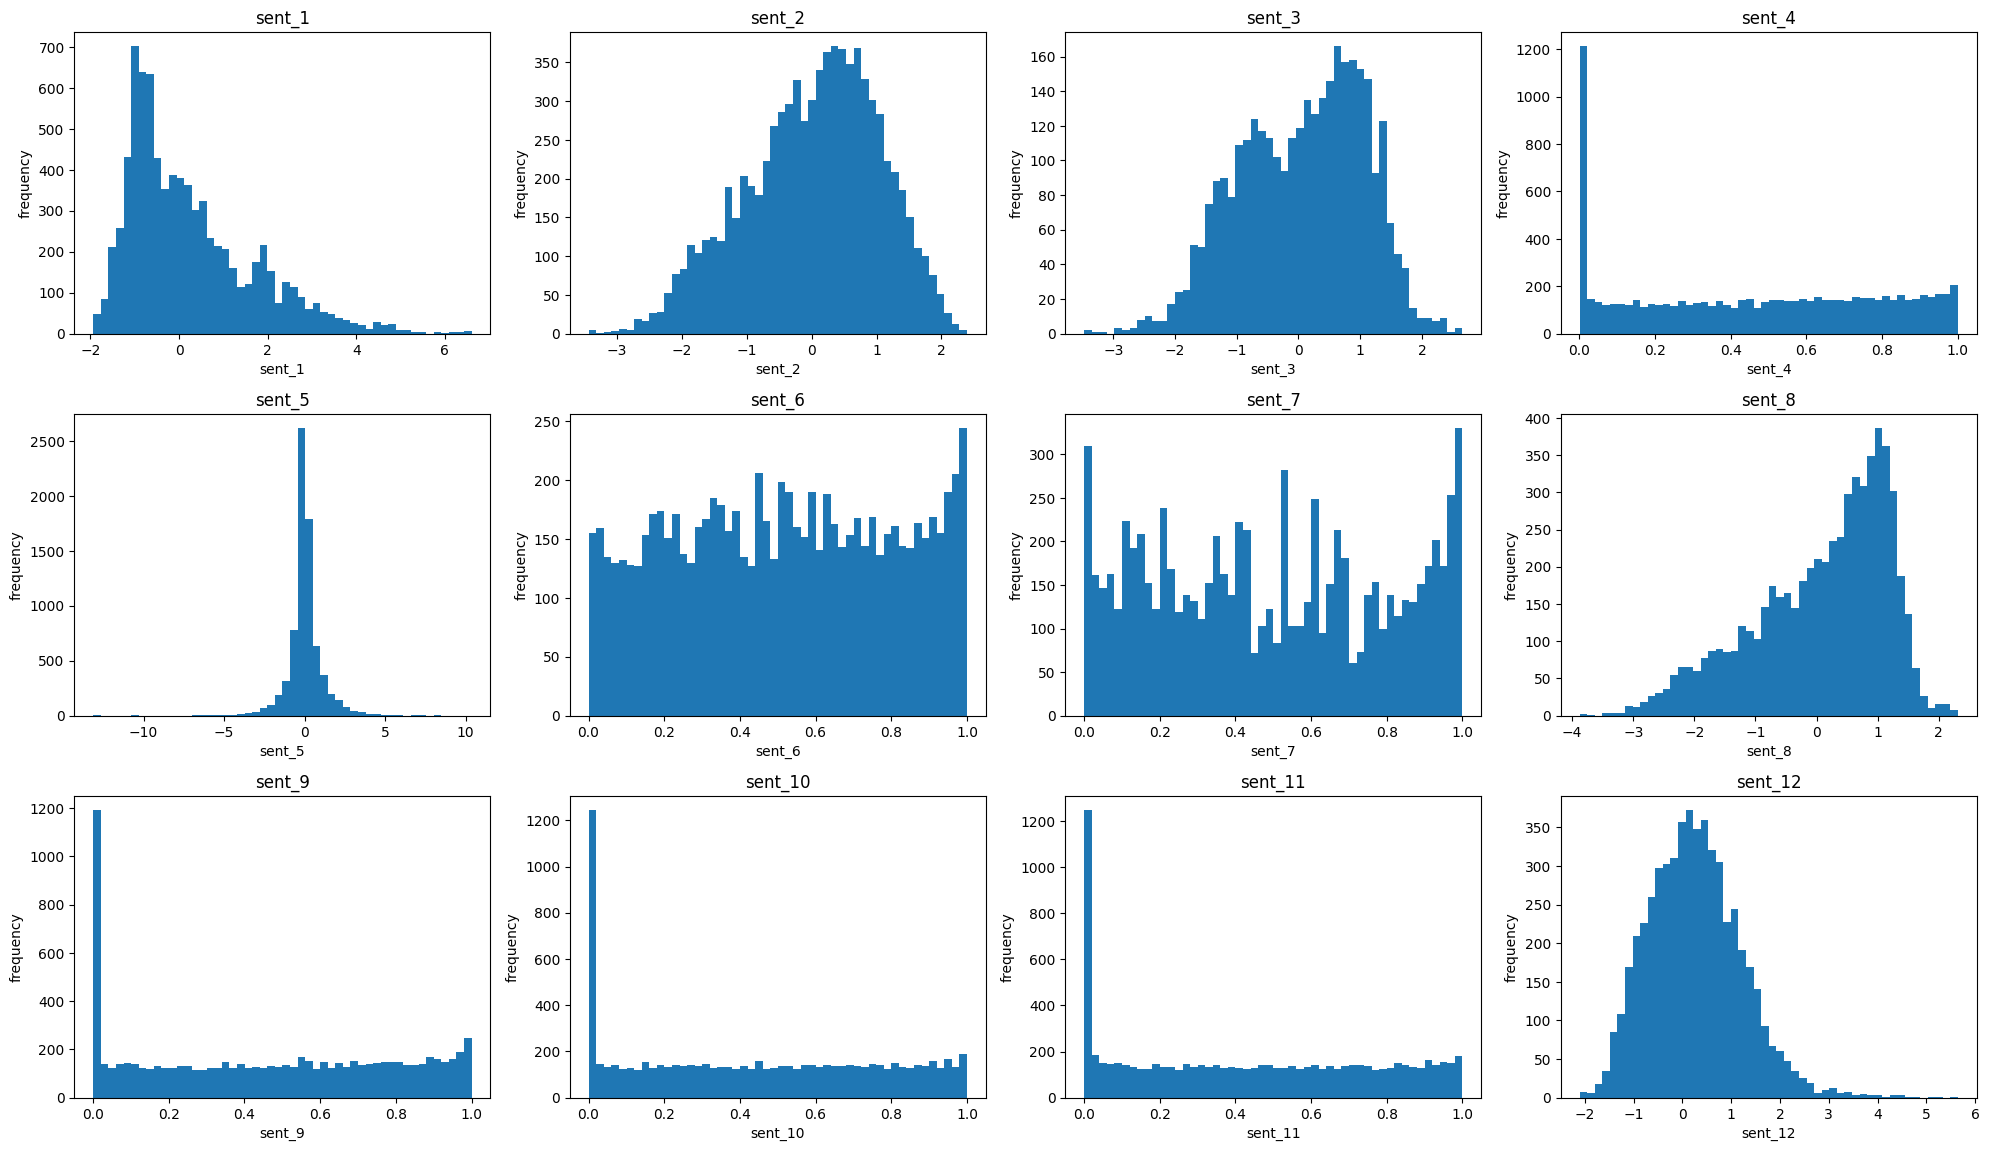

In [31]:
import matplotlib.pyplot as plt

sent_cols = [f"sent_{i}" for i in range(1, 13)]

n_cols = 4
n_rows = 4   # 12 plots fit into a 4×4 grid

plt.figure(figsize=(20, 15))

for i, col in enumerate(sent_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50)  # histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()


# Volume

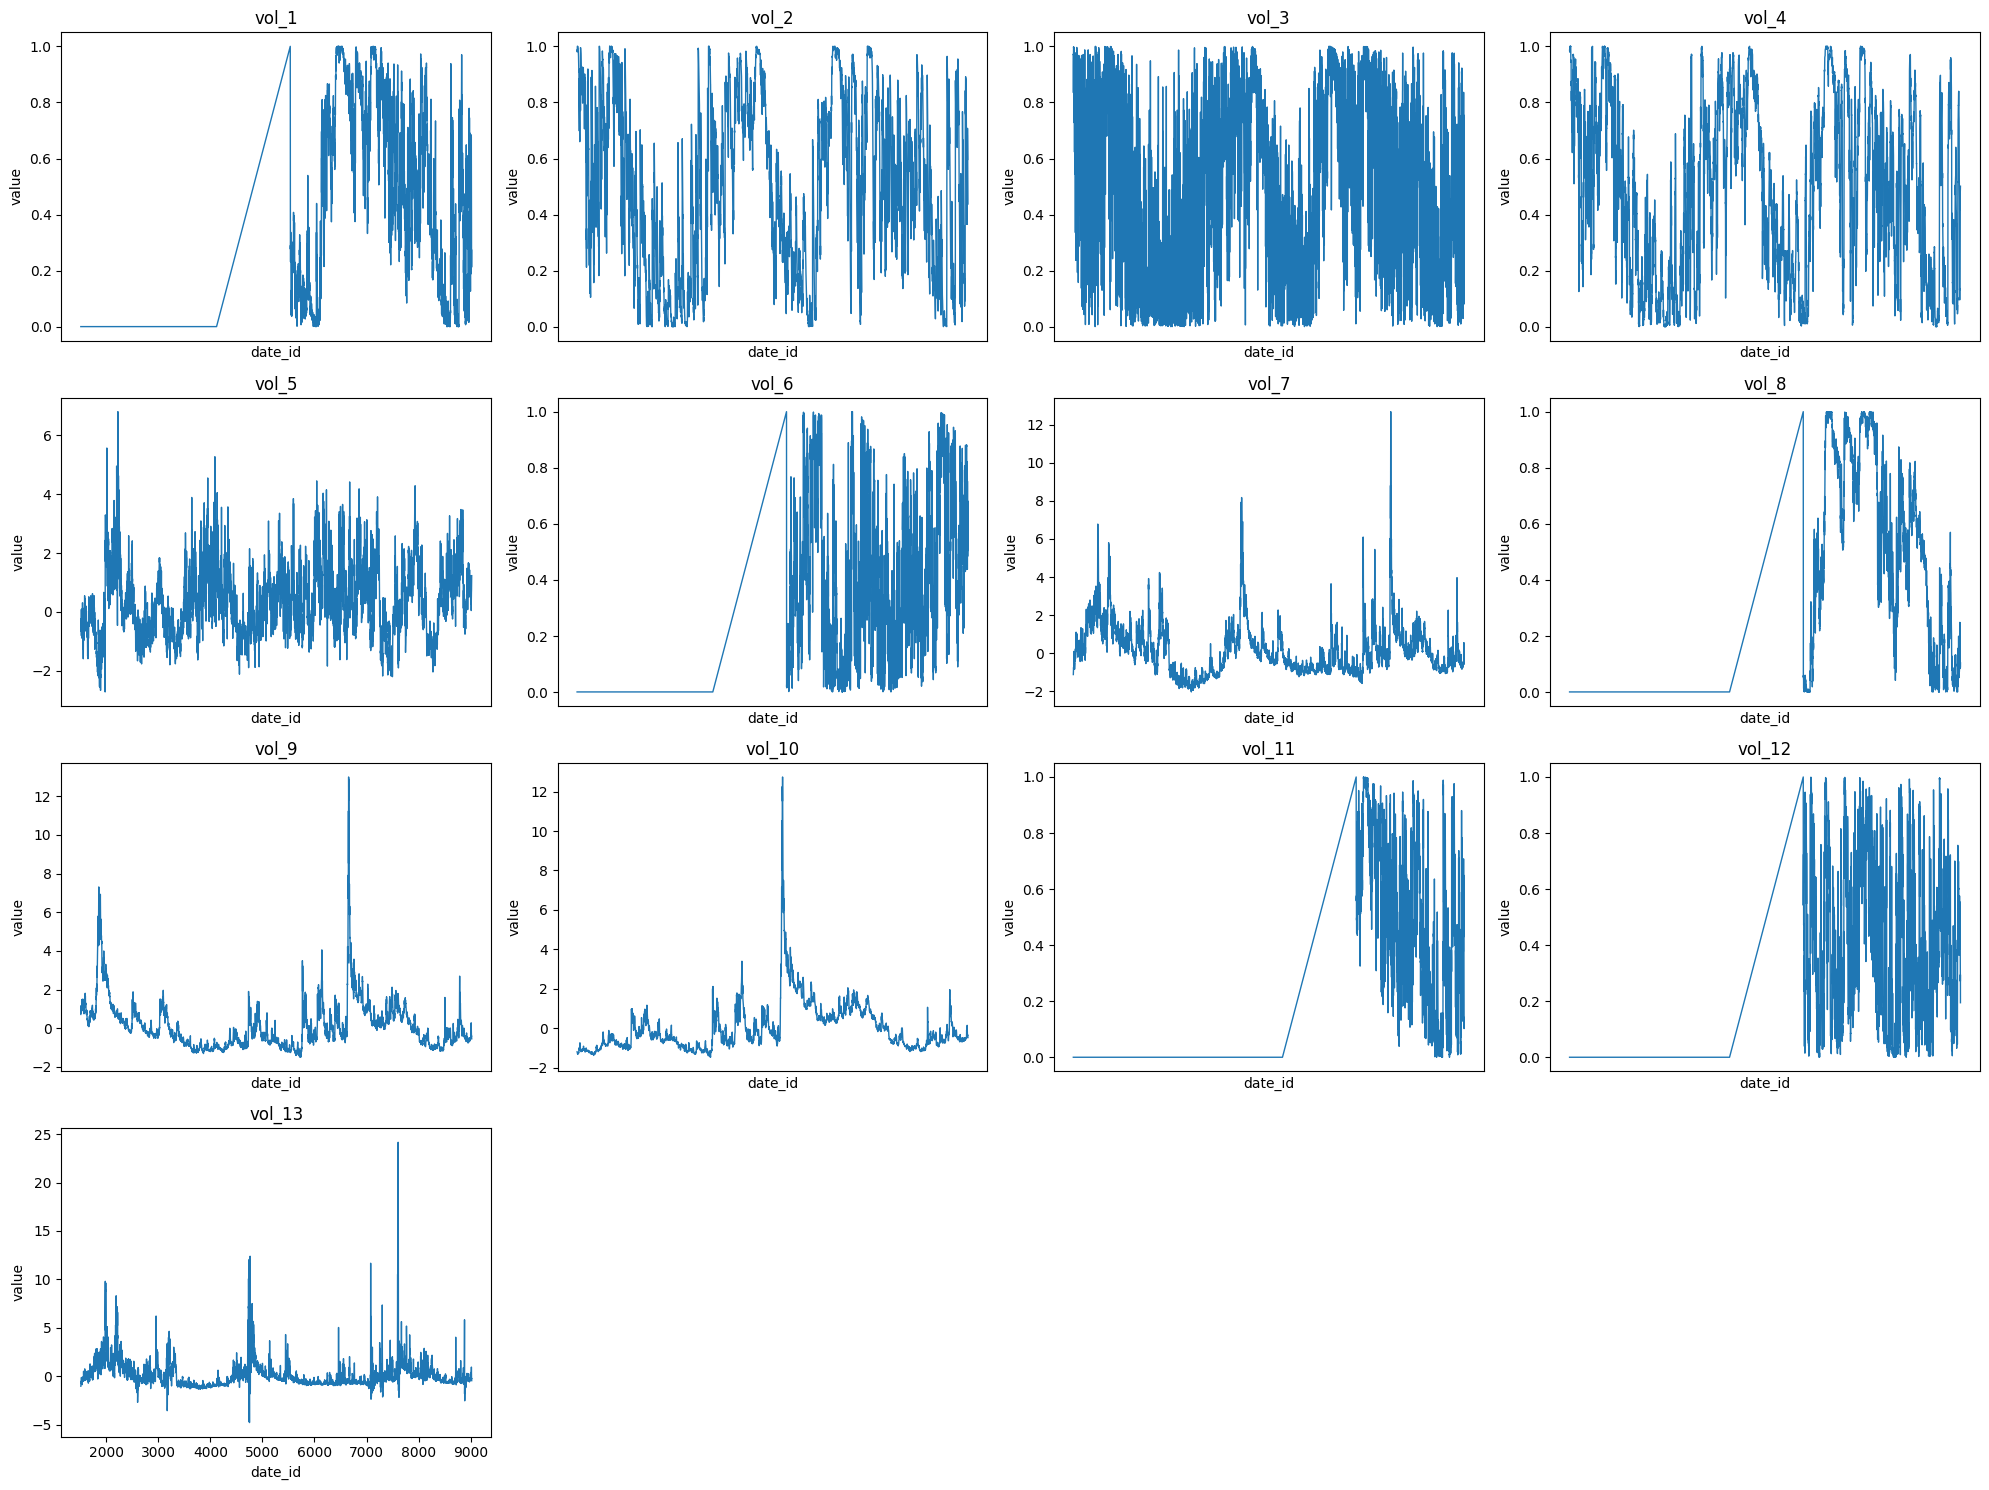

In [ ]:
# Volume Attribute
vol_cols = [f"vol_{i}" for i in range(1, 14)]

n_cols = 4
n_rows = 4   # 13 plots fit nicely in a 4×4 grid

plt.figure(figsize=(20, 15))

for i, col in enumerate(vol_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.plot(df['date_id'], df[col], linewidth=1.0)  # default Matplotlib colors
    plt.title(col)
    plt.xlabel("date_id")
    plt.ylabel("value")

    # Reduce x-axis clutter
    if i <= (n_rows - 1) * n_cols:
        plt.xticks([])

plt.tight_layout()
plt.show()

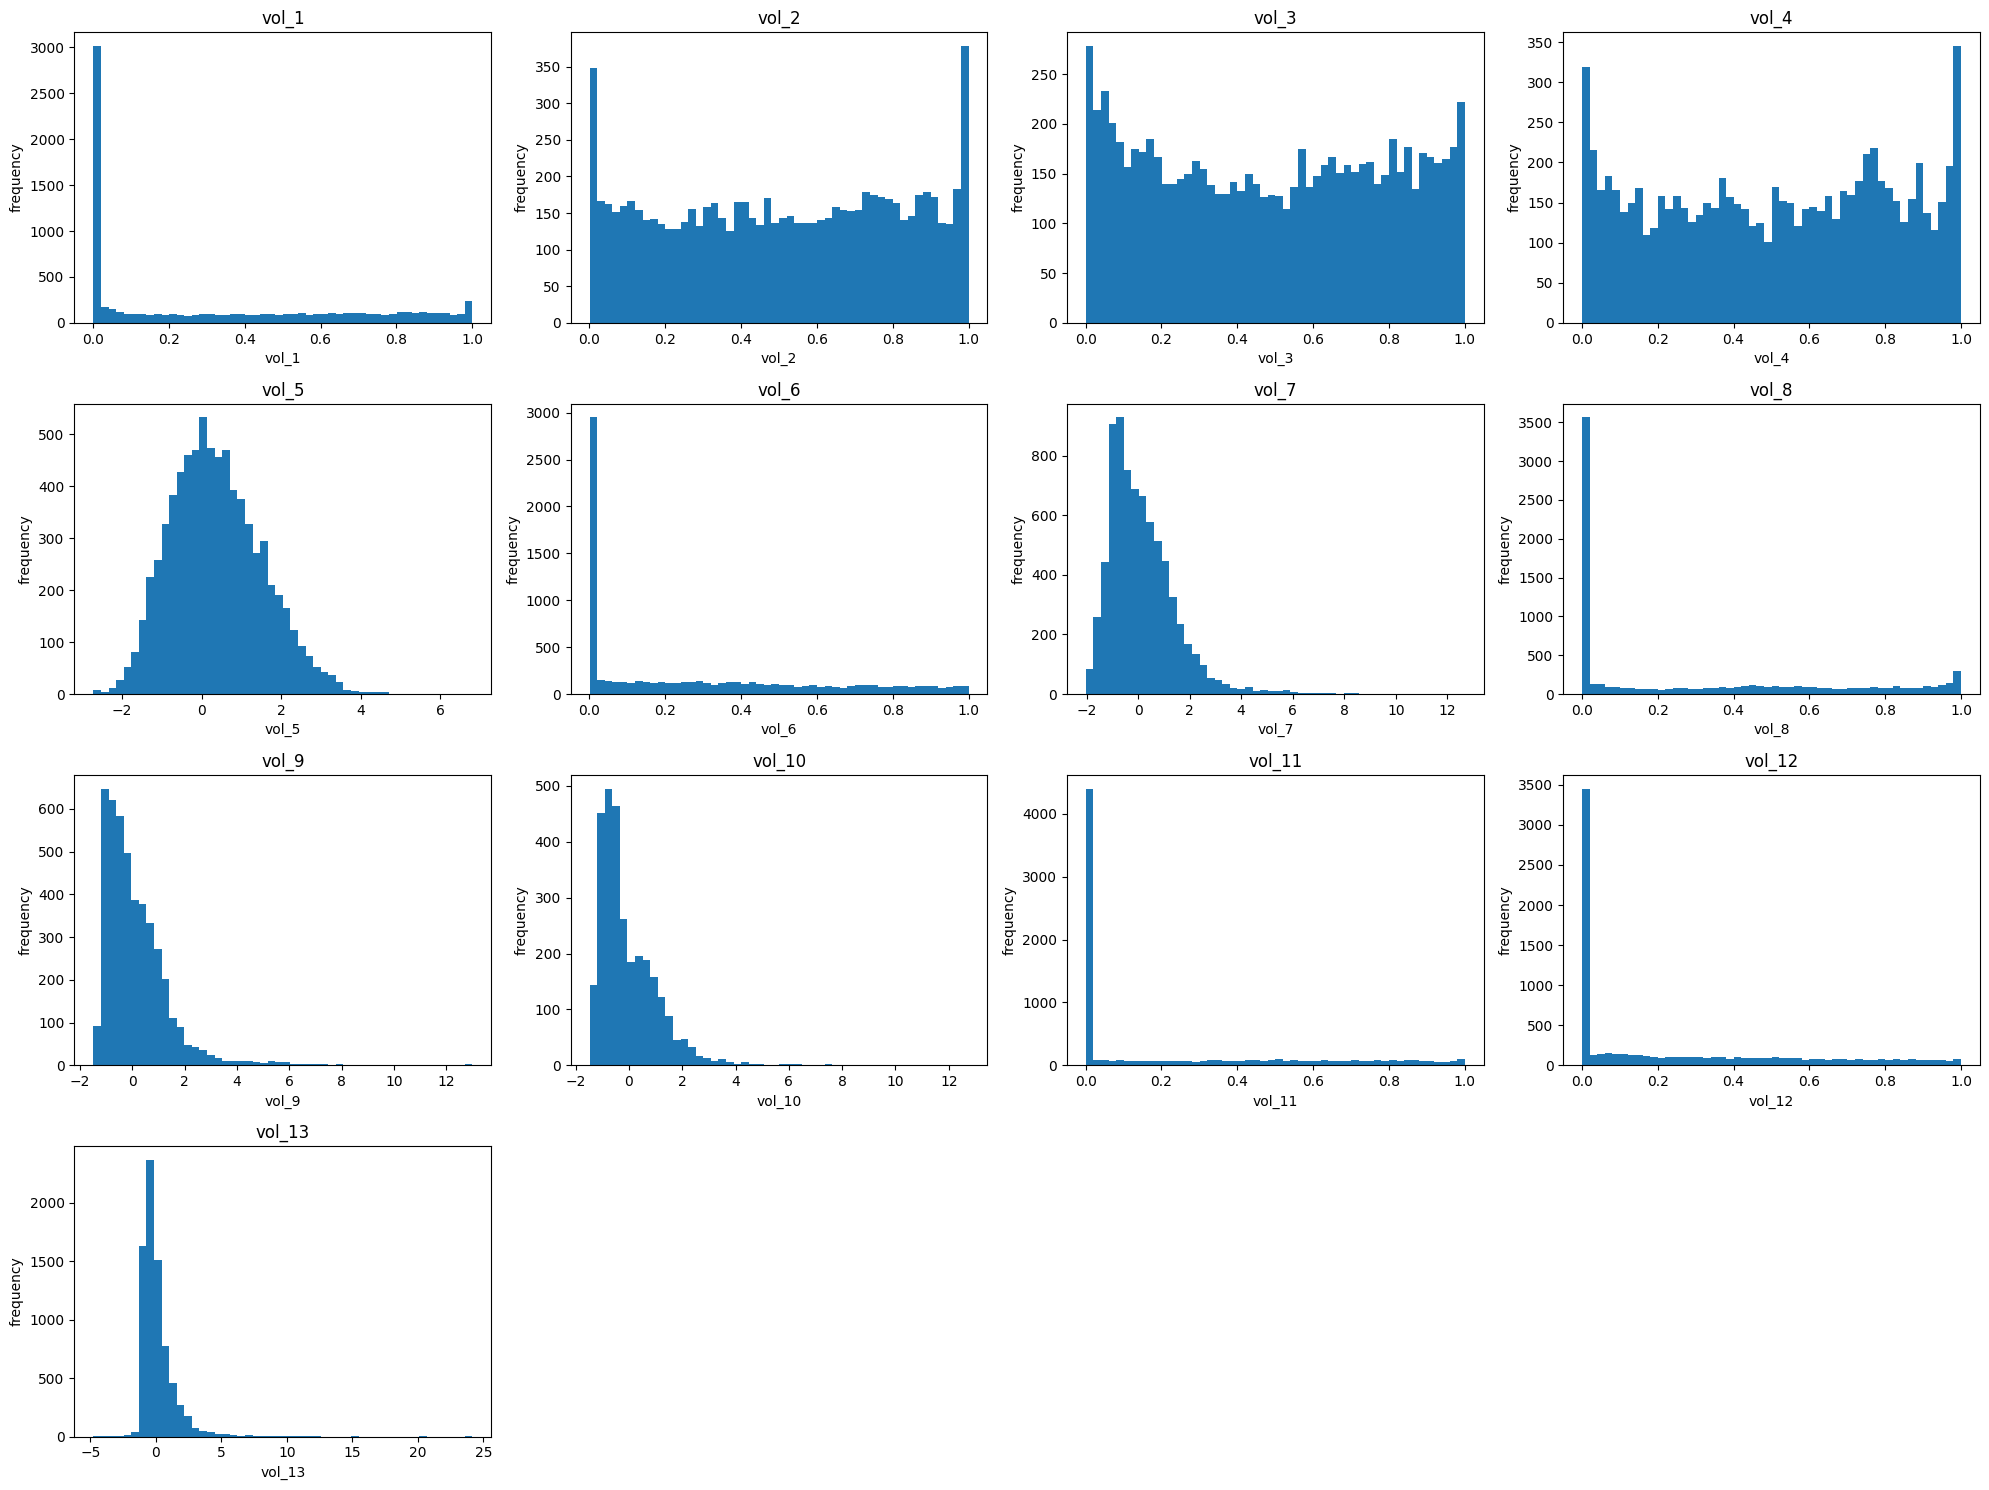

In [30]:
import matplotlib.pyplot as plt

vol_cols = [f"vol_{i}" for i in range(1, 14)]

n_cols = 4
n_rows = 4   # 13 plots fit nicely in a 4×4 grid

plt.figure(figsize=(20, 15))

for i, col in enumerate(vol_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=50)   # histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()


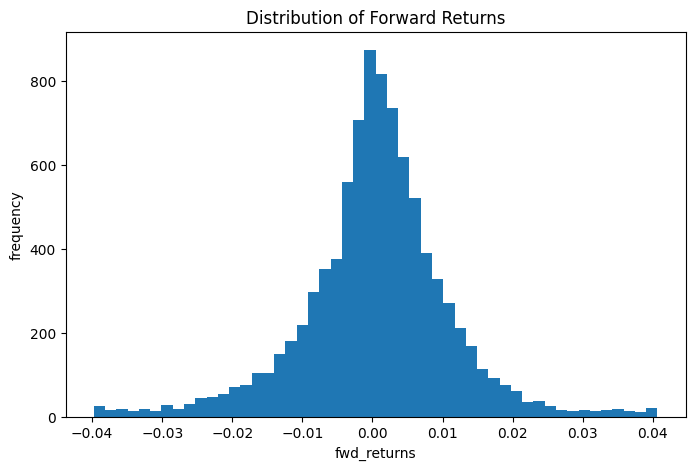

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df['fwd_returns'], bins=50)
plt.xlabel("fwd_returns")
plt.ylabel("frequency")
plt.title("Distribution of Forward Returns")
plt.show()


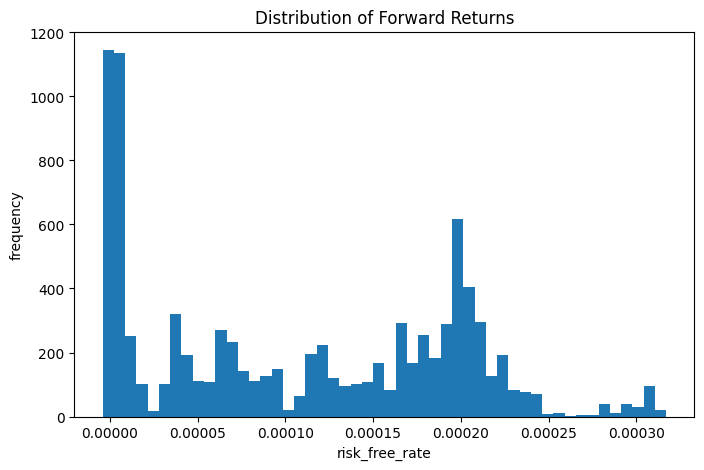

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df['risk_free_rate'], bins=50)
plt.xlabel("risk_free_rate")
plt.ylabel("frequency")
plt.title("Distribution of Forward Returns")
plt.show()

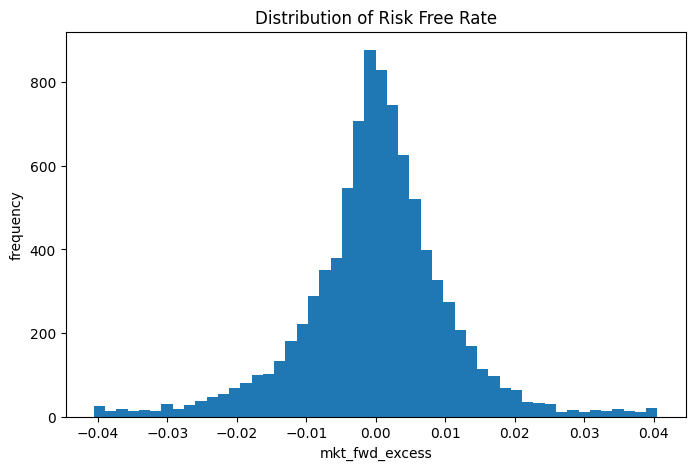

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df['mkt_fwd_excess'], bins=50)
plt.xlabel("mkt_fwd_excess")
plt.ylabel("frequency")
plt.title("Distribution of Risk Free Rate")
plt.show()